# DSCI-631 Project Phase 1

# Hospital Readmissions Prediction
Team Members - Deepak Bhadouria, Jibin Joby, Jeromey Abraham

#  Dataset and Objective
This dataset contains information on patients who have been hospitalized for diabetes-related conditions. It includes variables such as the age bracket of the patient, the length of hospital stay, the number of procedures and medications administered, and the number of visits to outpatient and emergency rooms in the year prior to the hospitalization. The dataset also includes the medical specialty of the admitting physician, primary and secondary diagnoses, and whether the patient received glucose and A1C tests. Additionally, it indicates whether there was a change in diabetes medication and whether a diabetes medication was prescribed, as well as whether the patient was readmitted to the hospital.

The objective of this project is to predict the likelihood of a patient being readmitted to the hospital. 

This file is a 10-year history of hospital readmission data delineated by various measures of diabetes diagnosis. The dataset contains 17 columns and 25000 rows and has no null values.

# Data Features – Names, Datatypes & Descriptions 
* "age" -  object - age group of the patient 
* "time_in_hospital" – integer - days (from 1 to 14) 
* "n_procedures" – integer -  number of procedures performed during the hospital stay 
* "n_lab_procedures" - integer - number of laboratory procedures performed during the hospital stay 
* "n_medications" - integer  - number of medications administered during the hospital stay 
* "n_outpatient" - integer - number of outpatient visits in the year before a hospital stay 
* "n_inpatient" - integer  - number of inpatient visits in the year before the hospital stay 
* "n_emergency" - integer  - number of visits to the emergency room in the year before the hospital stay 
* "medical_specialty" – object - the specialty of the admitting physician 
* "diag_1" - object  - primary diagnosis (Circulatory, Respiratory, Digestive, etc.) 
* "diag_2" - object  - secondary diagnosis 
* "diag_3" - object  - additional secondary diagnosis 
* "glucose_test" - object  - whether the glucose serum came out as high (> 200), normal, or not performed 
* "A1Ctest" - object  - whether the A1C level of the patient came out as high (> 7%), normal, or not performed 
* "change" - object  - whether there was a change in the diabetes medication ('yes' or 'no') 
* "diabetes_med" – object - whether a diabetes medication was prescribed ('yes' or 'no') 
* "readmitted" - object - if the patient was readmitted at the hospital ('yes' or 'no') 

In [59]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
readmits = pd.read_csv('hospital_readmissions.csv')
readmits.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


# EDA and Preprocessing

In [7]:
readmits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [14]:
readmits.isnull().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [8]:
readmits.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [54]:
cols = ['diag_1','diag_2','diag_3']
for i in cols:
    print(i)
    print(readmits[i].unique())

diag_1
['Circulatory' 'Other' 'Injury' 'Digestive' 'Respiratory' 'Diabetes'
 'Musculoskeletal' 'Missing']
diag_2
['Respiratory' 'Other' 'Circulatory' 'Injury' 'Diabetes' 'Digestive'
 'Musculoskeletal' 'Missing']
diag_3
['Other' 'Circulatory' 'Diabetes' 'Respiratory' 'Injury' 'Musculoskeletal'
 'Digestive' 'Missing']


In [57]:
# Would have to refill the values in 'Missing' and 'Other' rows

readmits["medical_specialty"].value_counts()

Missing                   12382
InternalMedicine           3565
Other                      2664
Emergency/Trauma           1885
Family/GeneralPractice     1882
Cardiology                 1409
Surgery                    1213
Name: medical_specialty, dtype: int64

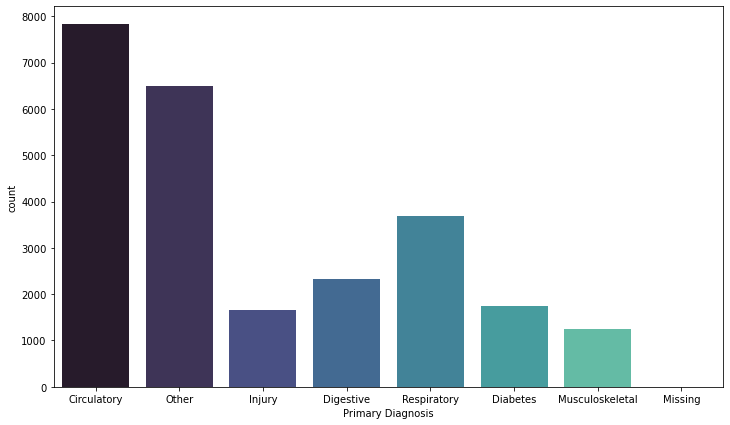

In [42]:
plt.figure(figsize = (12, 7))
sns.countplot(x='diag_1', data=readmits, palette='mako')
plt.xlabel("Primary Diagnosis")
plt.show()

In [10]:
readmits.groupby(['medical_specialty']).mean()['n_medications']

medical_specialty
Cardiology                17.069553
Emergency/Trauma          14.705570
Family/GeneralPractice    14.625930
InternalMedicine          15.144180
Missing                   16.424810
Other                     17.055180
Surgery                   19.964551
Name: n_medications, dtype: float64

In [11]:
corr_matrix = readmits.corr()
corr_matrix["n_emergency"].sort_values(ascending=False)

n_emergency         1.000000
n_inpatient         0.220285
n_outpatient        0.096912
n_medications       0.012944
n_lab_procedures   -0.004929
time_in_hospital   -0.013115
n_procedures       -0.042906
Name: n_emergency, dtype: float64

<AxesSubplot:>

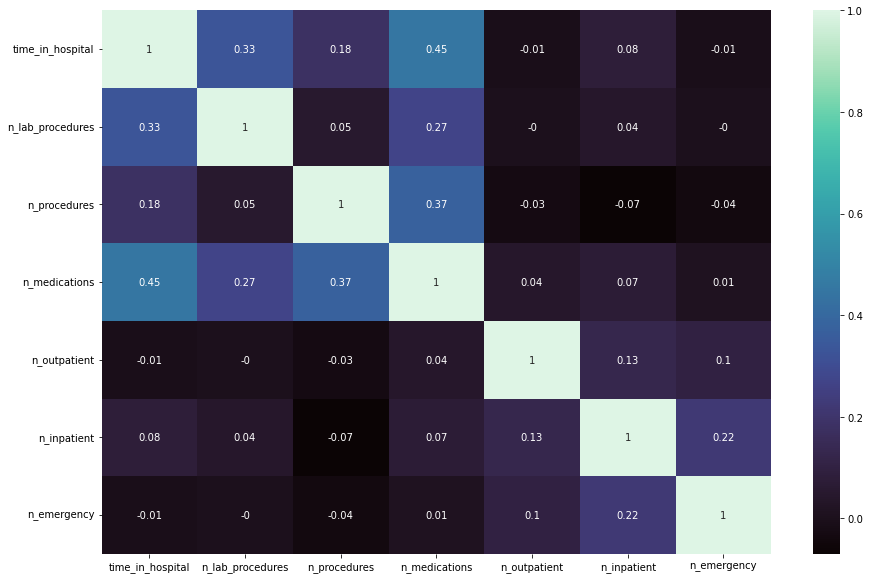

In [56]:
# Correaltion between variables

corr = readmits.corr().round(2)
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, cmap = 'mako')

# Some key points
* We have balanced target variable
* We have some outliers as well, but we'll keep them for phase 1
* Most of the patients are older as we can see, we got low count in the age group (90-100), as they are very few in general population
* Most of the data doesn't have A1C and glucose test 

In [18]:
readmits["readmitted"].value_counts()

no     13246
yes    11754
Name: readmitted, dtype: int64

<AxesSubplot:title={'center':'Variable readmitted'}, xlabel='readmitted', ylabel='count'>

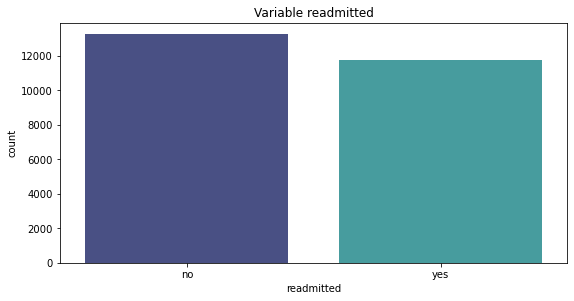

In [36]:
plt.figure(figsize = (20, 15))
plt.subplot(3, 2, 6)
plt.gca().set_title('Variable readmitted')
sns.countplot(x = 'readmitted', palette = 'mako', data = readmits)

<AxesSubplot:title={'center':'Discreet age group'}, xlabel='age', ylabel='count'>

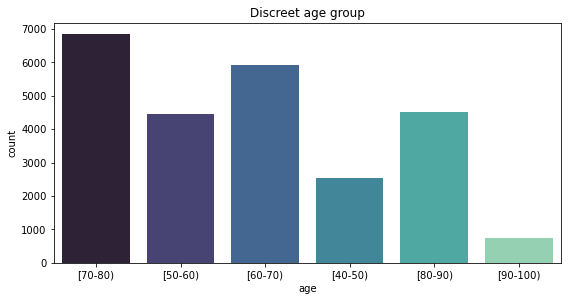

In [45]:
plt.figure(figsize = (20, 15))
plt.subplot(3, 2, 1)
plt.gca().set_title('Discreet age group')
sns.countplot(x = 'age', palette = 'mako', data = readmits)

<AxesSubplot:title={'center':'Var diabetes_med'}, xlabel='diabetes_med', ylabel='count'>

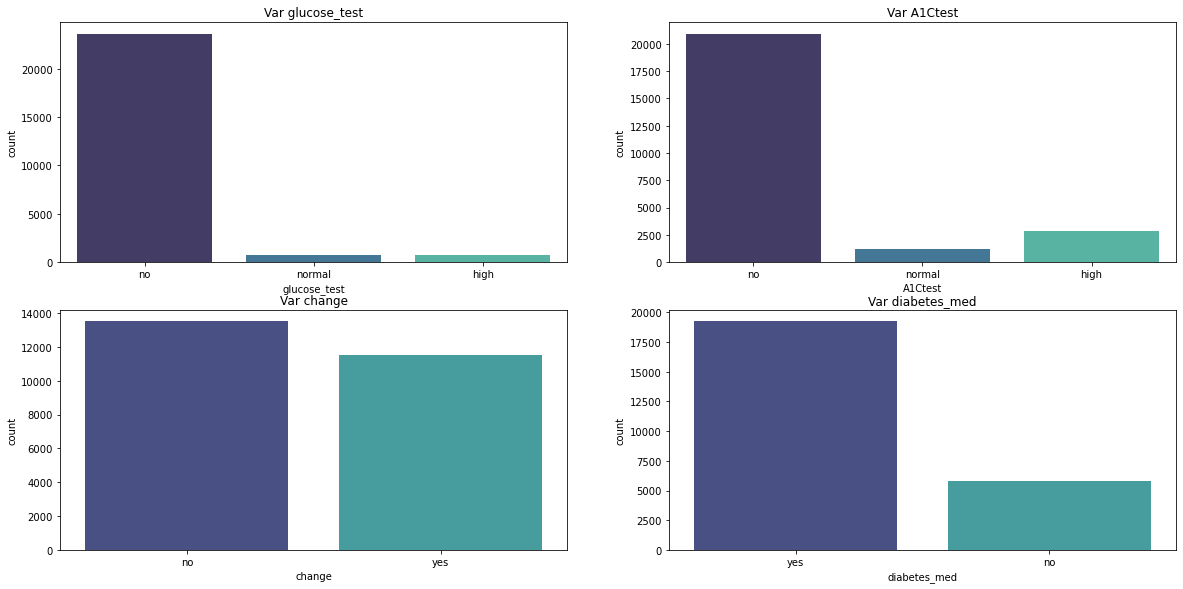

In [52]:
plt.figure(figsize = (20, 15))

plt.subplot(3, 2, 1)
plt.gca().set_title('Var glucose_test')
sns.countplot(x = 'glucose_test', palette = 'mako', data = readmits)

plt.subplot(3, 2, 2)
plt.gca().set_title('Var A1Ctest')
sns.countplot(x = 'A1Ctest', palette = 'mako', data = readmits)

plt.subplot(3, 2, 3)
plt.gca().set_title('Var change')
sns.countplot(x = 'change', palette = 'mako', data = readmits)

plt.subplot(3, 2, 4)
plt.gca().set_title('Var diabetes_med')
sns.countplot(x = 'diabetes_med', palette = 'mako', data = readmits)

<AxesSubplot:title={'center':'Boxplot time_in_hospital'}, xlabel='time_in_hospital'>

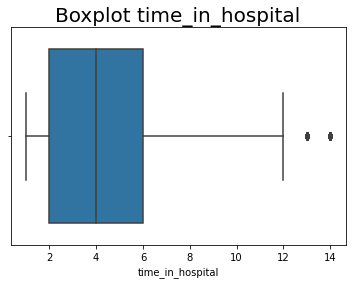

In [32]:
plt.title("Boxplot time_in_hospital", fontdict = {'fontsize': 20})
sns.boxplot(x=readmits["time_in_hospital"])

<AxesSubplot:title={'center':'Boxplot n_procedures'}, xlabel='n_procedures'>

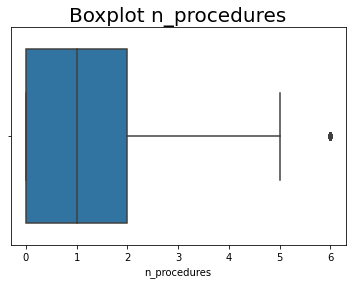

In [33]:
plt.title("Boxplot n_procedures", fontdict = {'fontsize': 20})
sns.boxplot(x=readmits["n_procedures"])

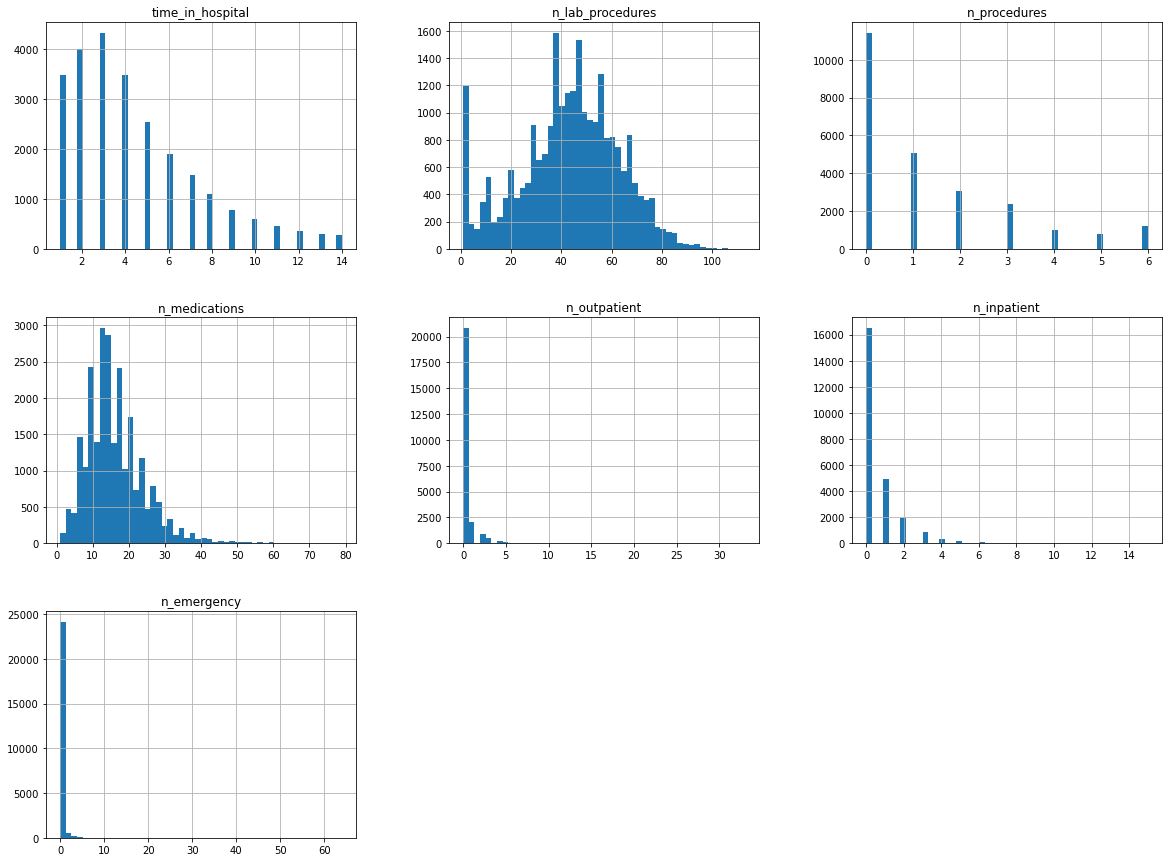

In [13]:
readmits.hist(bins=50, figsize=(20,15))
plt.show()

## ML models

### Predicting accurately the readmits is a classification problem, therefore we intend to use some of the well established predictive models which are :  
* SVM 
* Random Forrest classifier
* Binary Classification 
* Logistic regression 
* Decision Tree  

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('hospital_readmissions.csv')

# Select features and labels
X = data[['age', 'time_in_hospital', 'n_procedures', 'n_lab_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med']]
y = data['readmitted']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm = SVC()

# Train the SVM classifier
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='yes')
recall = recall_score(y_test, y_pred, pos_label='yes')
f1 = f1_score(y_test, y_pred, pos_label='yes')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Make predictions for new data
# new_data = pd.DataFrame({
#     'age': ['50 - 60'],
#     'time_in_hospital': [7],
#     'n_procedures': [3],
#     'n_lab_procedures': [40],
#     'n_medications': [15],
#     'n_outpatient': [2],
#     'n_inpatient': [1],
#     'n_emergency': [0],
#     'medical_specialty': ['Cardiology'],
#     'diag_1': ['Respiratory'],
#     'diag_2': ['Digestive'],
#     'diag_3': ['Circulatory'],
#     'glucose_test': ['normal'],
#     'A1Ctest': ['not performed'],
#     'change': ['yes'],
#     'diabetes_med': ['yes']
# })

# # Convert categorical variables to numerical for the new data
# new_data = pd.get_dummies(new_data)

# # Make predictions on the new data
# new_predictions = svm.predict(new_data)
# print("Predictions for new data:", new_predictions)


Accuracy: 0.6026
Precision: 0.7135980746089049
Recall: 0.25320239111870196
F1-score: 0.37377875827292784


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('hospital_readmissions.csv')

# Select features and labels
X = data[['age', 'time_in_hospital', 'n_procedures', 'n_lab_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med']]
y = data['readmitted']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the Random Forest Classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='yes')
recall = recall_score(y_test, y_pred, pos_label='yes')
f1 = f1_score(y_test, y_pred, pos_label='yes')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Make predictions for new data
# new_data = pd.DataFrame({
#     'age': ['50 - 60'],
#     'time_in_hospital': [7],
#     'n_procedures': [3],
#     'n_lab_procedures': [40],
#     'n_medications': [15],
#     'n_outpatient': [2],
#     'n_inpatient': [1],
#     'n_emergency': [0],
#     'medical_specialty': ['Cardiology'],
#     'diag_1': ['Respiratory'],
#     'diag_2': ['Digestive'],
#     'diag_3': ['Circulatory'],
#     'glucose_test': ['normal'],
#     'A1Ctest': ['not performed'],
#     'change': ['yes'],
#     'diabetes_med': ['yes']
# })

# # Convert categorical variables to numerical for the new data
# new_data = pd.get_dummies(new_data)

# # Make predictions on the new data
# new_predictions = rf_classifier.predict(new_data)
# print("Predictions for new data:", new_predictions)


Accuracy: 0.61
Precision: 0.5977068793619142
Recall: 0.5119555935098207
F1-score: 0.5515179392824288


In [11]:
!pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 2.5 MB/s eta 0:00:00a 0:00:01


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder_age = LabelEncoder()
label_encoder_medical_specialty = LabelEncoder()
label_encoder_diag_1 = LabelEncoder()
label_encoder_diag_2 = LabelEncoder()
label_encoder_diag_3 = LabelEncoder()
label_encoder_glucose_test = LabelEncoder()
label_encoder_A1Ctest = LabelEncoder()
label_encoder_diabetes_med = LabelEncoder()
label_encoder_readmitted = LabelEncoder()
label_encoder_change = LabelEncoder()

data['age'] = label_encoder_age.fit_transform(data['age'])
data['medical_specialty'] = label_encoder_medical_specialty.fit_transform(data['medical_specialty'])
data['diag_1'] = label_encoder_diag_1.fit_transform(data['diag_1'])
data['diag_2'] = label_encoder_diag_2.fit_transform(data['diag_2'])
data['diag_3'] = label_encoder_diag_3.fit_transform(data['diag_3'])
data['glucose_test'] = label_encoder_glucose_test.fit_transform(data['glucose_test'])
data['A1Ctest'] = label_encoder_A1Ctest.fit_transform(data['A1Ctest'])
data['diabetes_med'] = label_encoder_diabetes_med.fit_transform(data['diabetes_med'])
data['readmitted'] = label_encoder_readmitted.fit_transform(data['readmitted'])
data['change'] = label_encoder_change.fit_transform(data['change'])

In [15]:
X = data.drop('readmitted', axis = 1)
X = X.values
y = data['readmitted']

### standardscaler

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

0.5793333333333334

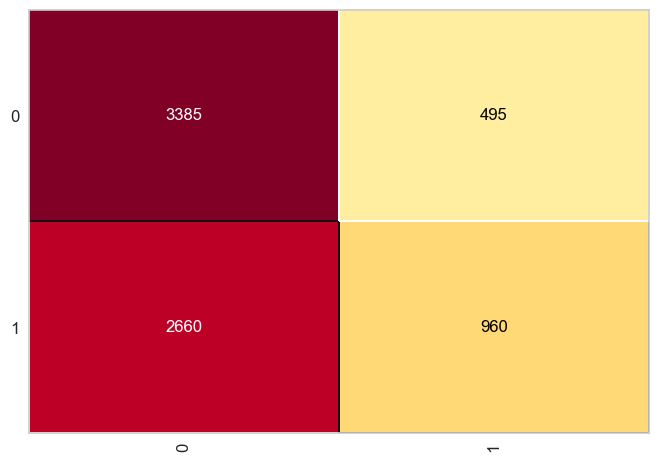

In [18]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [19]:
classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.56      0.87      0.68      3880
           1       0.66      0.27      0.38      3620

    accuracy                           0.58      7500
   macro avg       0.61      0.57      0.53      7500
weighted avg       0.61      0.58      0.54      7500



### Decision tree

In [24]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = DecisionTreeClassifier()
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridDecisionTree.fit(X_train, y_train)

print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  3
Max Nvl:  6
Algorithm:  entropy
Score:  0.6083999999999999


0.6008

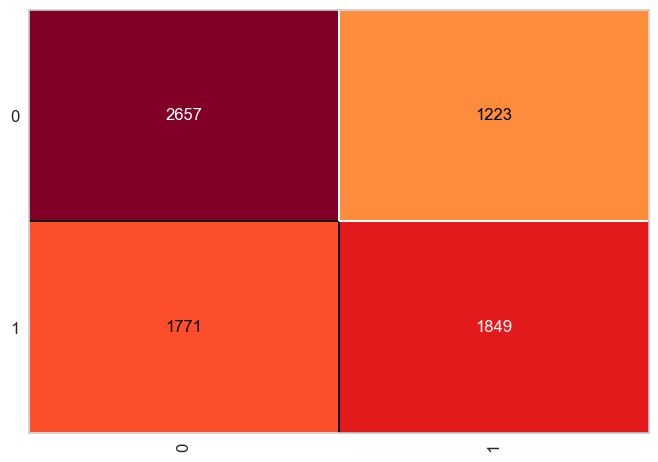

In [25]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 5, max_depth= 6, random_state=0)
decision_tree.fit(X_train, y_train)
previsoes = decision_tree.predict(X_test)

cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [26]:
classification_decision = (classification_report(y_test, previsoes))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.60      0.68      0.64      3880
           1       0.60      0.51      0.55      3620

    accuracy                           0.60      7500
   macro avg       0.60      0.60      0.60      7500
weighted avg       0.60      0.60      0.60      7500



In [28]:
columns = data.drop('readmitted', axis = 1).columns
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

n_inpatient          0.583138
n_outpatient         0.092084
n_lab_procedures     0.057160
age                  0.056925
n_emergency          0.055719
n_medications        0.055368
diabetes_med         0.029257
medical_specialty    0.021766
time_in_hospital     0.014918
diag_3               0.011633
diag_1               0.010595
A1Ctest              0.004892
diag_2               0.003362
glucose_test         0.003183
n_procedures         0.000000
change               0.000000
dtype: float64

### random forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = np.array([100])
alg = ['entropy', 'gini']
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
values_grid = {'n_estimators': n_estimators, 'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = RandomForestClassifier()
gridRandomForest = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridRandomForest.fit(X_train, y_train)

print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  gini
Score:  0.622742857142857
Mín Split:  4
Max Nvl:  11


0.6061333333333333

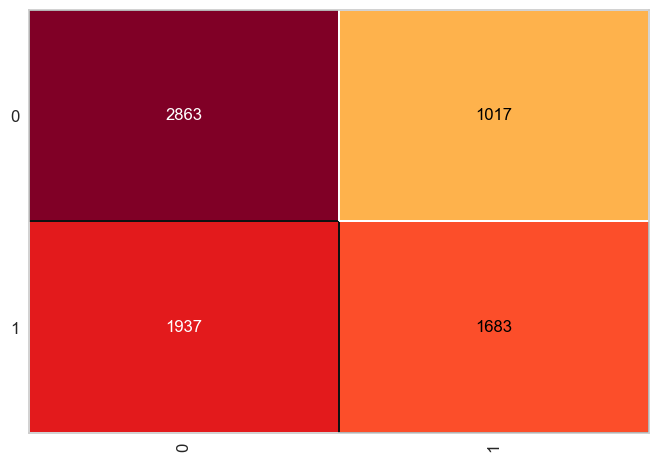

In [21]:
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 5, max_depth= 11,  criterion = 'gini', random_state = 0)
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)

cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)


In [22]:
classification_random = (classification_report(y_test, previsoes))
print(classification_random)

              precision    recall  f1-score   support

           0       0.60      0.74      0.66      3880
           1       0.62      0.46      0.53      3620

    accuracy                           0.61      7500
   macro avg       0.61      0.60      0.60      7500
weighted avg       0.61      0.61      0.60      7500



In [29]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

n_inpatient          0.194800
n_lab_procedures     0.118835
n_medications        0.118370
time_in_hospital     0.072643
age                  0.061712
n_outpatient         0.060871
medical_specialty    0.055067
diag_1               0.052950
n_procedures         0.049127
n_emergency          0.048385
diag_3               0.046730
diag_2               0.042728
A1Ctest              0.022605
diabetes_med         0.019586
glucose_test         0.019564
change               0.016025
dtype: float64

### CODE


In [30]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC

from sklearn.pipeline import make_pipeline

from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    mean_squared_error,
    mean_absolute_percentage_error,
    confusion_matrix,
    make_scorer,
    precision_score,
    recall_score,
    RocCurveDisplay,
    roc_auc_score,
    r2_score
)

data_all = pd.read_csv('hospital_readmissions.csv')
data_all['age'] = data_all['age'].str.replace('[','(',regex=False)
data_all

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,(70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,(70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,(50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,(70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,(60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,(80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,(80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,(70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,(70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no


In [31]:
data_all.shape

(25000, 17)

In [32]:
data_all.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [33]:
data_all.isnull().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [34]:
cols = ['medical_specialty','diag_1','diag_2','diag_3']
for i in cols:
    print(i)
    print(data_all[i].unique())

medical_specialty
['Missing' 'Other' 'InternalMedicine' 'Family/GeneralPractice'
 'Cardiology' 'Surgery' 'Emergency/Trauma']
diag_1
['Circulatory' 'Other' 'Injury' 'Digestive' 'Respiratory' 'Diabetes'
 'Musculoskeletal' 'Missing']
diag_2
['Respiratory' 'Other' 'Circulatory' 'Injury' 'Diabetes' 'Digestive'
 'Musculoskeletal' 'Missing']
diag_3
['Other' 'Circulatory' 'Diabetes' 'Respiratory' 'Injury' 'Musculoskeletal'
 'Digestive' 'Missing']


In [35]:
data_all['diag_1'] = np.where(data_all['diag_1'] == 'Other', 
                            np.where(data_all['diag_2'] == 'Other',
                                     data_all['diag_3'],
                                     data_all['diag_2']
                                    ), 
                            data_all['diag_1'])
data_all['diag_1'].value_counts(normalize=True)

Circulatory        0.39128
Respiratory        0.17760
Diabetes           0.12628
Digestive          0.10988
Injury             0.07576
Other              0.06272
Musculoskeletal    0.05600
Missing            0.00048
Name: diag_1, dtype: float64

In [36]:
textCols = ['glucose_test','A1Ctest','change','diabetes_med','readmitted']
for i in textCols:
    print(i)
    print(data_all[i].unique())

glucose_test
['no' 'normal' 'high']
A1Ctest
['no' 'normal' 'high']
change
['no' 'yes']
diabetes_med
['yes' 'no']
readmitted
['no' 'yes']


In [37]:
binaryCols = ['change','diabetes_med','readmitted']
for i in binaryCols:
    data_all[i] = data_all[i].apply(lambda x: 0 if x == 'no' else 1)

In [38]:
noNormalHighCols = ['glucose_test','A1Ctest']
le = LabelEncoder()
for i in noNormalHighCols:
    #df_all[i] = le.fit_transform(df_all[i])
    data_all[i+'_ind'] = data_all[i].apply(lambda x: 0 if x == 'no' else 1 if x == 'normal' else 2)

data_all['age_t'] = le.fit_transform(data_all['age'])

In [39]:
data_all

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,glucose_test_ind,A1Ctest_ind,age_t
0,(70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,0,1,0,0,0,3
1,(70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,0,1,0,0,0,3
2,(50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,1,1,1,0,0,1
3,(70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,1,1,1,0,0,3
4,(60-70),1,42,0,7,0,0,0,InternalMedicine,Circulatory,Circulatory,Respiratory,no,no,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,(80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,0,0,1,0,1,4
24996,(80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,1,1,1,0,2,4
24997,(70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,0,0,1,1,0,3
24998,(70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,1,1,0,0,0,3


In [40]:
data_all.dtypes

age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change                int64
diabetes_med          int64
readmitted            int64
glucose_test_ind      int64
A1Ctest_ind           int64
age_t                 int64
dtype: object

### most common primary diagnosis by age group

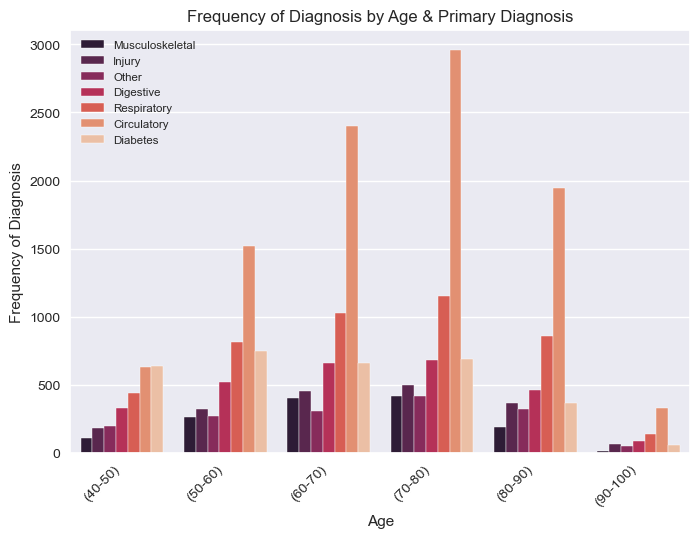

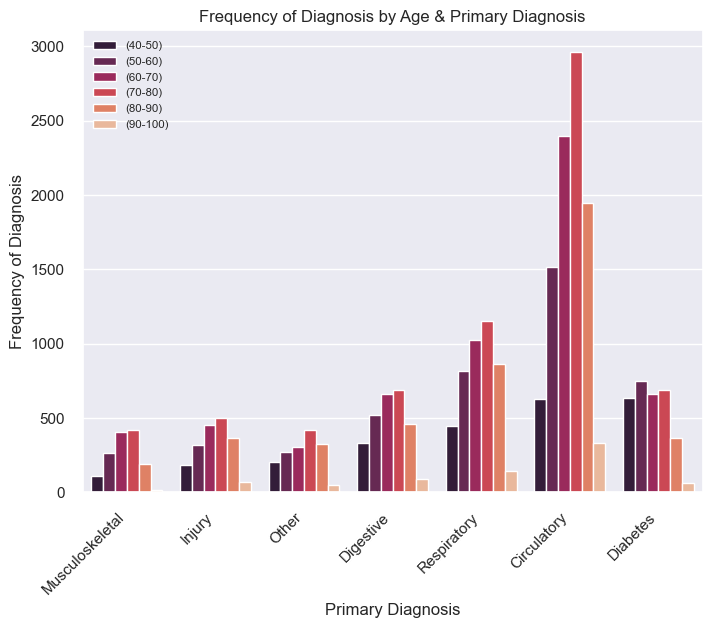

In [41]:
#What is the most common primary diagnosis by age group?
groupings = [['age',True,'Age','Primary Diagnosis'],
             ['diag_2',False,'Primary Diagnosis','Age']]

for i in groupings:
    data_chart = data_all.groupby(['age','diag_1']).agg({'diag_2':'count'}).reset_index().sort_values(i[0],ascending=i[1])
    data_chart = data_chart.rename(columns={'age': 'Age',
                                        'diag_1':'Primary Diagnosis',
                                        'diag_2':'Frequency'}).sort_values(by=['Age','Frequency'])
    data_chart = data_chart[data_chart['Primary Diagnosis'] != 'Missing']

    chart = sns.barplot(data=data_chart,x=i[2],y="Frequency",hue=i[3],palette = 'rocket')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    sns.set(rc={'figure.figsize':(8,6)})
    plt.legend(loc='upper left',fontsize='x-small',title_fontsize='x-small')
    plt.ylabel('Frequency of Diagnosis')
    plt.title("Frequency of Diagnosis by Age & Primary Diagnosis")
    plt.show()

### Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates.

In [42]:
#Add diabetes indicator (i.e. if any of diagnoses are diabetes 1, else 0)
diagCols = ['diag_1','diag_2','diag_3']
diag = 'Diabetes'

data_all['Diabetes_ind'] = (data_all['diag_1'].str.contains(diag) | data_all['diag_2'].str.contains(diag) | data_all['diag_3'].str.contains(diag)) * 1

In [43]:
data_all[data_all['Diabetes_ind'] == 1].head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,...,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,glucose_test_ind,A1Ctest_ind,age_t,Diabetes_ind
3,(70-80),2,36,0,12,1,0,0,Missing,Circulatory,...,Diabetes,no,no,1,1,1,0,0,3,1
12,(70-80),8,67,0,21,0,0,0,Other,Diabetes,...,Other,no,normal,0,1,0,0,1,3,1
14,(80-90),2,73,1,26,0,0,0,InternalMedicine,Circulatory,...,Diabetes,no,no,0,1,0,0,0,4,1
16,(70-80),3,52,0,10,0,0,0,Other,Circulatory,...,Diabetes,no,no,0,1,1,0,0,3,1
18,(40-50),7,72,0,13,0,0,0,InternalMedicine,Diabetes,...,Other,no,high,0,1,1,0,2,0,1


In [44]:
data_all['readmitted'].value_counts(normalize=True)

0    0.52984
1    0.47016
Name: readmitted, dtype: float64

In [45]:
data_all[['Diabetes_ind','readmitted']].value_counts(normalize=True)

Diabetes_ind  readmitted
0             0             0.34188
              1             0.30660
1             0             0.18796
              1             0.16356
dtype: float64

In [46]:
#Quick Look at readmission rates (normalized value_counts)
print(data_all[['Diabetes_ind']].value_counts(normalize=False))
print(data_all[['Diabetes_ind']].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
print('')

print(data_all[['Diabetes_ind','readmitted']].value_counts(normalize=False))
print(data_all[['Diabetes_ind','readmitted']].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

#Early look suggests Diabetes Diagnosis does not suggest disproportionate rates of hospital readmission
#Next step, let's look graphically at Readmittance rates by age buckets and various indicators of diabetes beyond diagnosis

Diabetes_ind
0               16212
1                8788
dtype: int64
Diabetes_ind
0               64.8%
1               35.2%
dtype: object

Diabetes_ind  readmitted
0             0             8547
              1             7665
1             0             4699
              1             4089
dtype: int64
Diabetes_ind  readmitted
0             0             34.2%
              1             30.7%
1             0             18.8%
              1             16.4%
dtype: object


### Chart Review - Readmission Rates by Various Diabetes Features


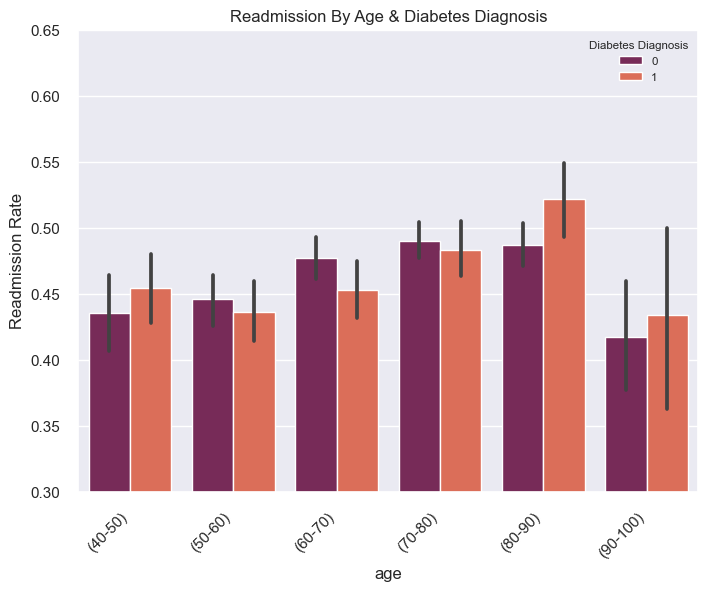

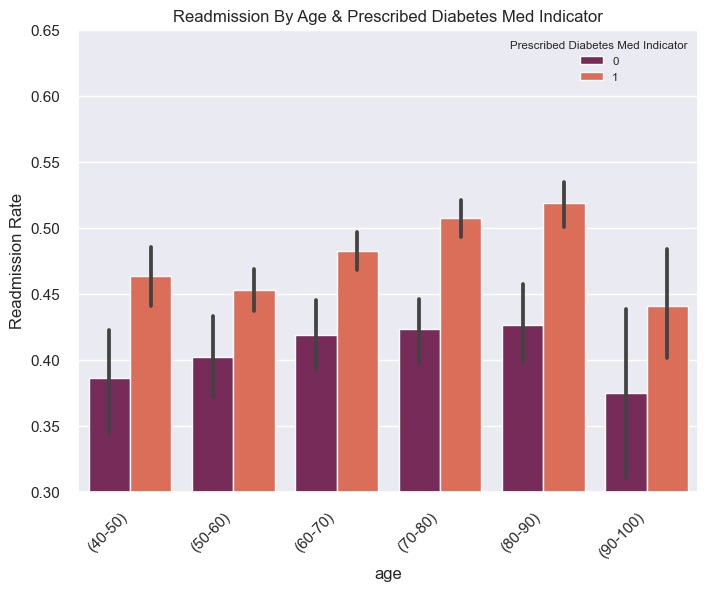

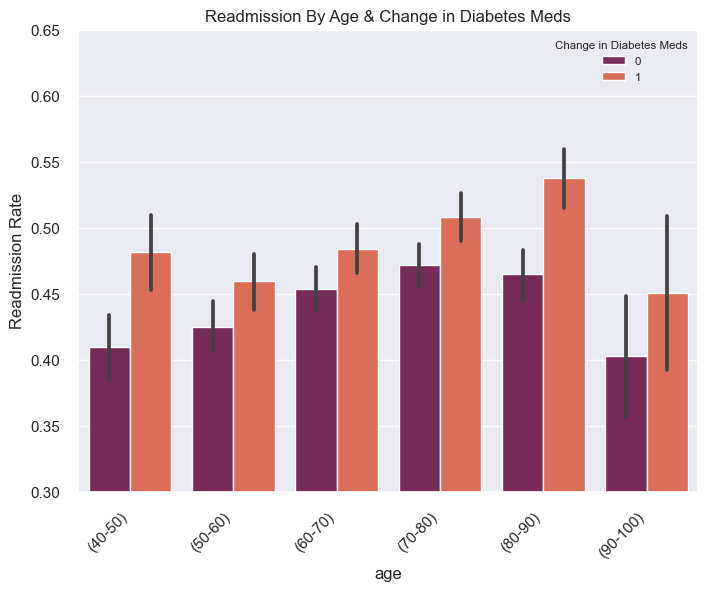

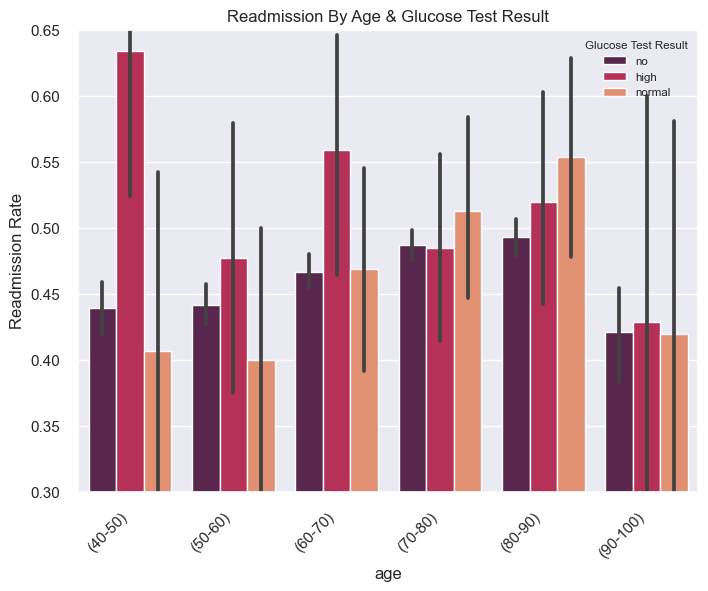

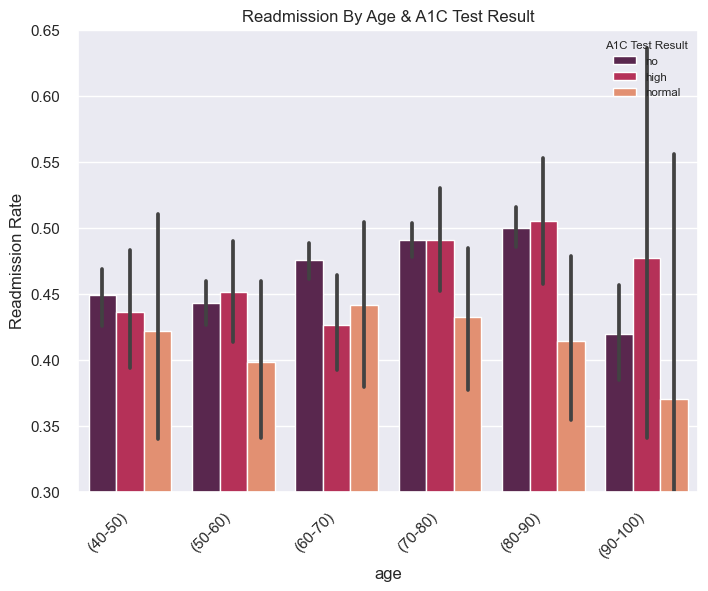

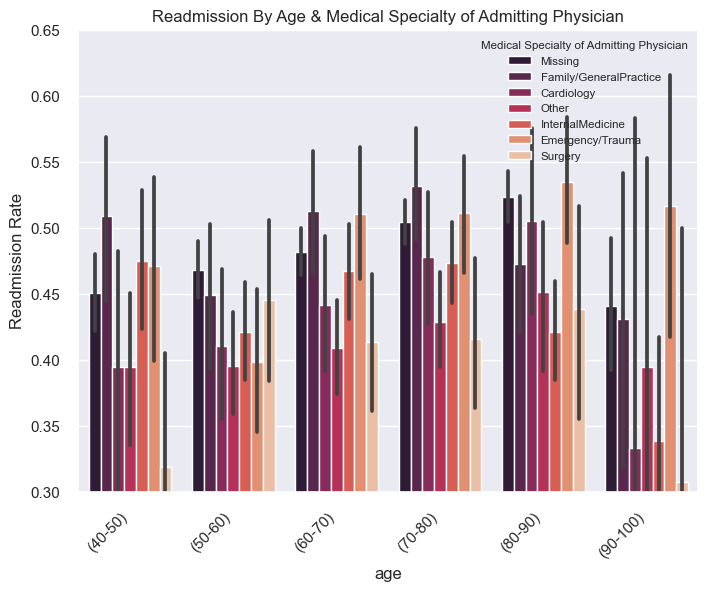

In [47]:
cols = {'Diabetes_ind':'Diabetes Diagnosis',
        'diabetes_med':'Prescribed Diabetes Med Indicator',
        'change':'Change in Diabetes Meds', 
        'glucose_test':'Glucose Test Result',
        'A1Ctest':'A1C Test Result',
        'medical_specialty':'Medical Specialty of Admitting Physician'
        }
data_chart = data_all.sort_values('age')

for i in cols.keys():
    chart = sns.barplot(data=data_chart,x='age',y="readmitted",hue=i,palette = 'rocket')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    chart.set(ylim=(0.3, 0.65))
    sns.set(rc={'figure.figsize':(8,6)})
    plt.legend(loc='upper right',title=cols[i],fontsize='x-small',title_fontsize='x-small')
    plt.ylabel('Readmission Rate')
    plt.title("Readmission By Age & "+cols[i])
    plt.show()

### Bucketing Continuous Variables & Visualization Conclusions

### Bucketing Continuous Variables

In [48]:
#Create Buckets for the continuous variables (n_lab_procedures, n_medications, n_outpatient, n_emergency, n_inpatient) in order to see the readmission impact across these variables and diabetes diagnoses
#n_lab_procedures bucketing
visits = pd.qcut(data_all['n_lab_procedures'],[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                      labels=['1st Decile', '2nd Decile','3rd Decile','4th Decile',
                              '5th Decile','6th Decile','7th Decile','8th Decile',
                              '9th Decile','10th Decile'])
data_all['n_lab_procedures_bucket'] = visits

#n_medications bucketing
medications = pd.qcut(data_all['n_medications'],[0, 0.2, 0.4, 0.6, 0.8, 1.0],
                      labels=['Low', 'Low Moderate','Moderate', 
                              'High', 'Very High'])
data_all['n_medications_bucket'] = medications

#n_outpatient bucketing
visits = pd.cut(data_all['n_outpatient'],bins = [-0.001, 0, 1, 10, 25],
                      labels=['None', 'One','Up to 10', 
                              'Up to 25'])
data_all['n_outpatient_bucket'] = visits

#n_emergency bucketing
visits = pd.cut(data_all['n_emergency'],bins = [-0.001, 0, 1, 10, 100],
                      labels=['None', 'One','Up to 10', 
                              '>10'])
data_all['n_emergency_bucket'] = visits

#n_inpatient bucketing
visits = pd.cut(data_all['n_inpatient'],bins = [-0.001, 0, 1, 5, 10, 15],
                      labels=['None', 'One','Up to 5','Up to 10', 
                              '>10'])
data_all['n_inpatient_bucket'] = visits

### Bucketed Charts

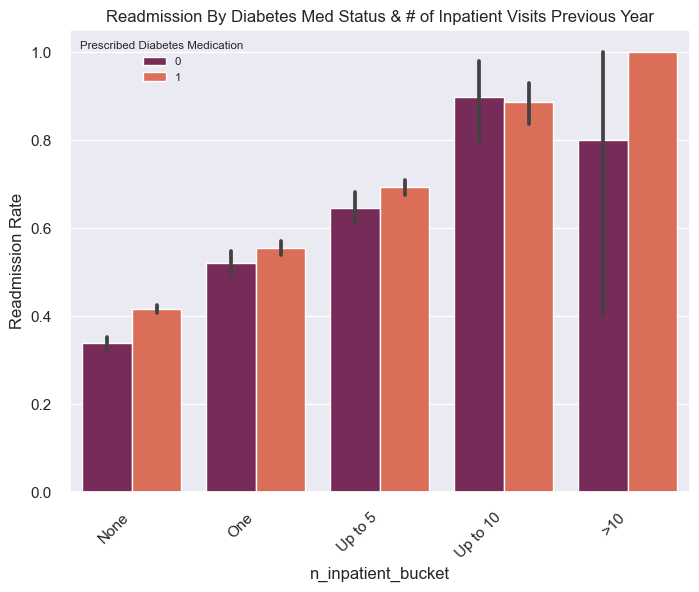

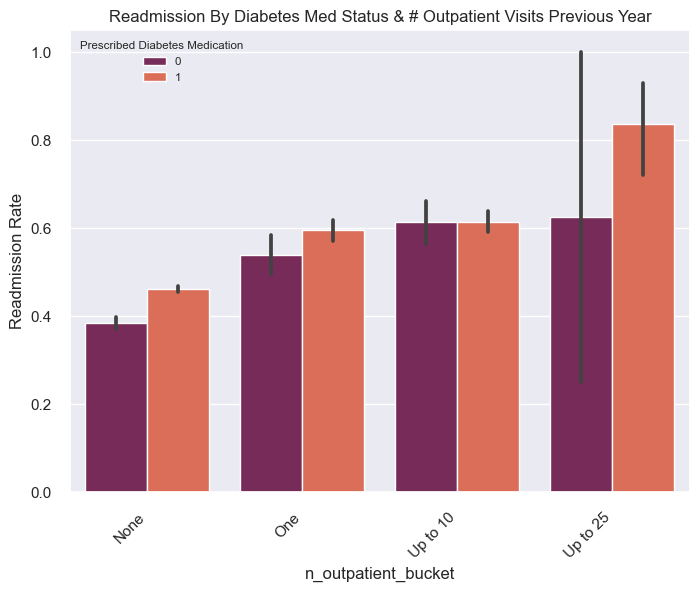

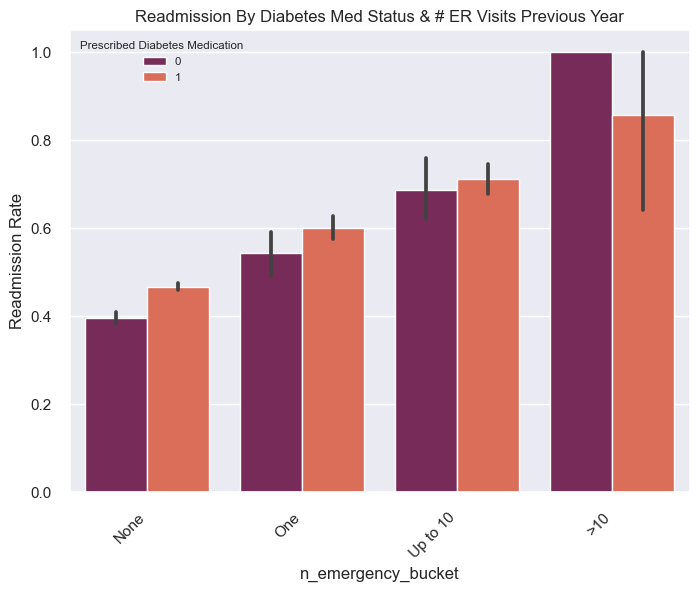

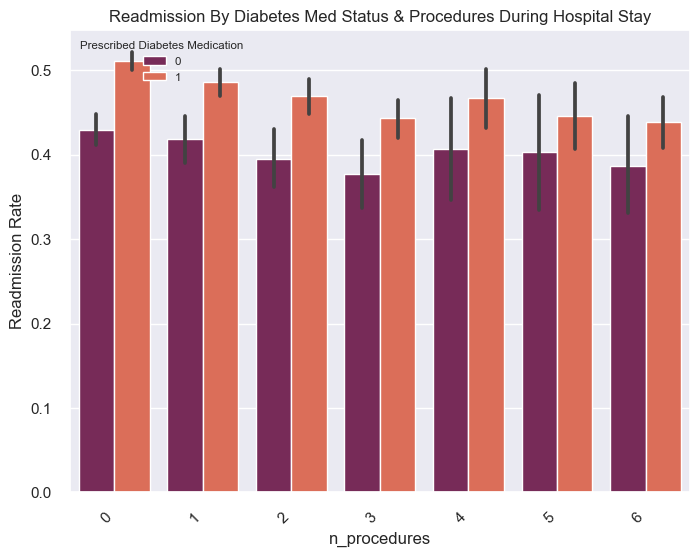

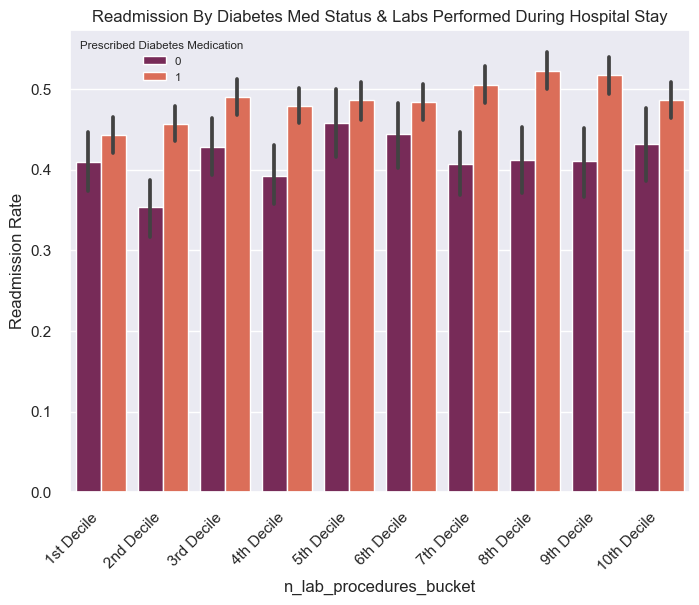

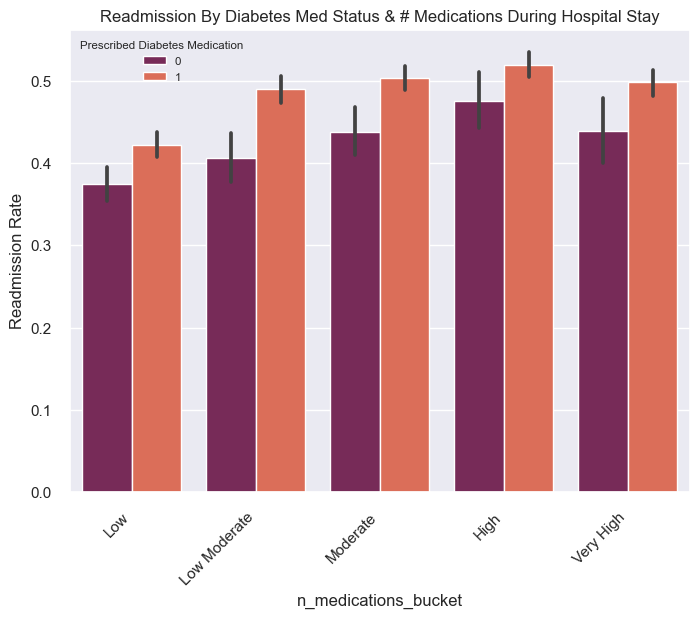

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = {
    'n_inpatient_bucket': '# of Inpatient Visits Previous Year',
    'n_outpatient_bucket': '# Outpatient Visits Previous Year',
    'n_emergency_bucket': '# ER Visits Previous Year',
    'n_procedures': 'Procedures During Hospital Stay',
    'n_lab_procedures_bucket': 'Labs Performed During Hospital Stay',
    'n_medications_bucket': '# Medications During Hospital Stay'
}

data_chart = data_all.sort_values('age')

for i in cols.keys():
    chart = sns.barplot(
        data=data_chart, x=i, y='readmitted', hue='diabetes_med',
        palette='rocket', ci=95
    )
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    sns.set(rc={'figure.figsize': (8, 6)})
    plt.legend(loc='upper left', title='Prescribed Diabetes Medication', fontsize='x-small', title_fontsize='x-small')
    plt.ylabel('Readmission Rate')
    plt.title("Readmission By Diabetes Med Status & " + cols[i])
    plt.show()


### We've looked at the data graphically, now let's do some statistical analysis...


### T-Tests: Statistically Significant Differences In Readmission Rates

### T-Tests by Diabetes Diagnosis

In [51]:
#A diabetes diagnosis does not signal a stat sig difference in readmission rates
#Only in one age cohort is this the case (80-90)
from scipy.stats import ttest_ind

for i in data_all['age'].sort_values().unique(): #Age groupings
    #define samples
    nonDiabetics = data_all[(data_all['Diabetes_ind']==0) & (data_all['age'] == i)]
    diabetics = data_all[(data_all['Diabetes_ind']==1) & (data_all['age'] == i)]

    print('T-test results in group: ',i)
    #perform independent two sample t-test
    print('Non-Diabetics Avg Readmittance: ',"{:.2f}%".format(np.mean(nonDiabetics['readmitted'])*100))
    print('Diabetics Avg Readmittance: ',"{:.2f}%".format(np.mean(diabetics['readmitted'])*100))
    print("T-Statistic {:.2f}:".format(ttest_ind(nonDiabetics['readmitted'], diabetics['readmitted']).statistic))
    print("P-Value {:.2f}%:".format(ttest_ind(nonDiabetics['readmitted'], diabetics['readmitted']).pvalue*100))
    print('')

T-test results in group:  (40-50)
Non-Diabetics Avg Readmittance:  43.53%
Diabetics Avg Readmittance:  45.40%
T-Statistic -0.94:
P-Value 34.52%:

T-test results in group:  (50-60)
Non-Diabetics Avg Readmittance:  44.58%
Diabetics Avg Readmittance:  43.62%
T-Statistic 0.64:
P-Value 52.30%:

T-test results in group:  (60-70)
Non-Diabetics Avg Readmittance:  47.69%
Diabetics Avg Readmittance:  45.31%
T-Statistic 1.75:
P-Value 7.97%:

T-test results in group:  (70-80)
Non-Diabetics Avg Readmittance:  49.00%
Diabetics Avg Readmittance:  48.33%
T-Statistic 0.52:
P-Value 60.54%:

T-test results in group:  (80-90)
Non-Diabetics Avg Readmittance:  48.70%
Diabetics Avg Readmittance:  52.20%
T-Statistic -2.04:
P-Value 4.10%:

T-test results in group:  (90-100)
Non-Diabetics Avg Readmittance:  41.73%
Diabetics Avg Readmittance:  43.41%
T-Statistic -0.40:
P-Value 68.98%:



### T-Tests by Diabetes Medication Prescription

In [52]:
#Diabetes_Med appears a significant feature
#Statistically significantly different rates of readmission across age cohorts
for i in data_all['age'].sort_values().unique(): #Age groupings
    #define samples
    noMeds = data_all[(data_all['diabetes_med']==0) & (data_all['age'] == i)]
    meds = data_all[(data_all['diabetes_med']==1) & (data_all['age'] == i)]

    print('T-test results in group: ',i)
    #perform independent two sample t-test
    print('No Diabetes Meds: ',"{:.2f}%".format(np.mean(noMeds['readmitted'])*100))
    print('Yes Diabetes Meds: ',"{:.2f}%".format(np.mean(meds['readmitted'])*100))
    print("T-Statistic {:.2f}:".format(ttest_ind(noMeds['readmitted'], meds['readmitted']).statistic))
    print("P-Value {:.2f}%:".format(ttest_ind(noMeds['readmitted'], meds['readmitted']).pvalue*100))
    print('')

T-test results in group:  (40-50)
No Diabetes Meds:  38.59%
Yes Diabetes Meds:  46.33%
T-Statistic -3.33:
P-Value 0.09%:

T-test results in group:  (50-60)
No Diabetes Meds:  40.19%
Yes Diabetes Meds:  45.25%
T-Statistic -2.80:
P-Value 0.52%:

T-test results in group:  (60-70)
No Diabetes Meds:  41.84%
Yes Diabetes Meds:  48.23%
T-Statistic -4.06:
P-Value 0.00%:

T-test results in group:  (70-80)
No Diabetes Meds:  42.31%
Yes Diabetes Meds:  50.77%
T-Statistic -5.94:
P-Value 0.00%:

T-test results in group:  (80-90)
No Diabetes Meds:  42.67%
Yes Diabetes Meds:  51.85%
T-Statistic -5.35:
P-Value 0.00%:

T-test results in group:  (90-100)
No Diabetes Meds:  37.44%
Yes Diabetes Meds:  44.07%
T-Statistic -1.67:
P-Value 9.50%:



### Preprocessing & Standardizing The Data

### Data Preprocessing

In [53]:
# Select columns for clustering
quantCols = data_all.select_dtypes(include=[int,float]).columns

# Create new DataFrame with clustering variables
data_features = data_all[quantCols]

data_features

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,change,diabetes_med,readmitted,glucose_test_ind,A1Ctest_ind,age_t,Diabetes_ind
0,8,72,1,18,2,0,0,0,1,0,0,0,3,0
1,3,34,2,13,0,0,0,0,1,0,0,0,3,0
2,5,45,0,18,0,0,0,1,1,1,0,0,1,0
3,2,36,0,12,1,0,0,1,1,1,0,0,3,1
4,1,42,0,7,0,0,0,0,1,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,14,77,1,30,0,0,0,0,0,1,0,1,4,0
24996,2,66,0,24,0,0,0,1,1,1,0,2,4,0
24997,5,12,0,6,0,1,0,0,0,1,1,0,3,0
24998,2,61,3,15,0,0,0,1,1,0,0,0,3,1


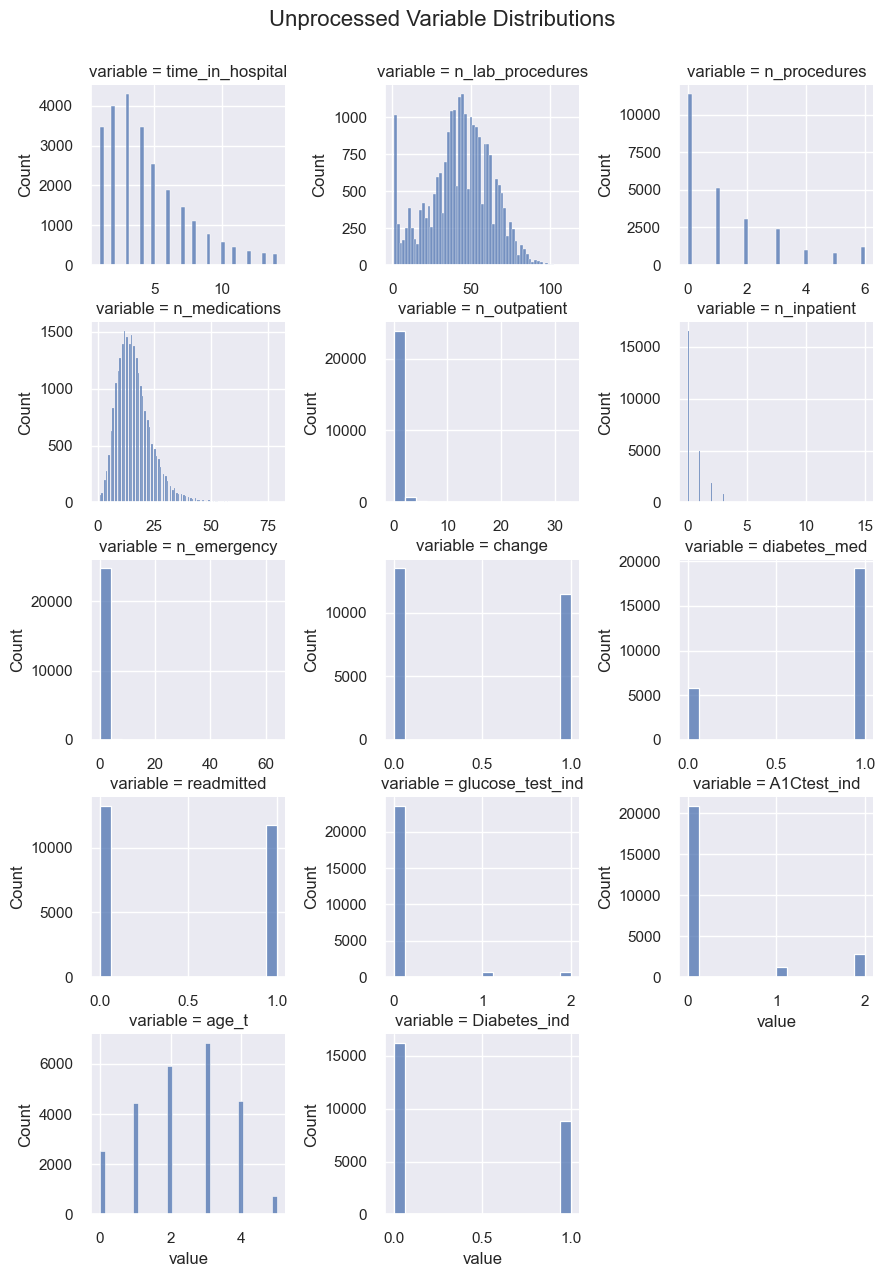

In [54]:
#Objective: Looks at the distribution of the feature variariables and see if there is any non-normality.
# Plot the distributions of the selected variables
g = sns.FacetGrid(
    data_features.melt(),  # Reformat the DataFrame for plotting purposes
    col='variable',  # Split on the 'variable' column created by reformating
    sharey=False,  # Turn off shared y-axis
    sharex=False,  # Turn off shared x-axis
    col_wrap = 3
)
# Apply a histogram to the facet grid
g.map(sns.histplot, "value")
# Adjust the top of the plots to make room for the title
g.fig.subplots_adjust(top=0.8)
# Create a title
g.fig.suptitle("Unprocessed Variable Distributions", fontsize=16,y=.85)
plt.show()

<AxesSubplot:title={'center':'Correlation Matrix of Model Features'}>

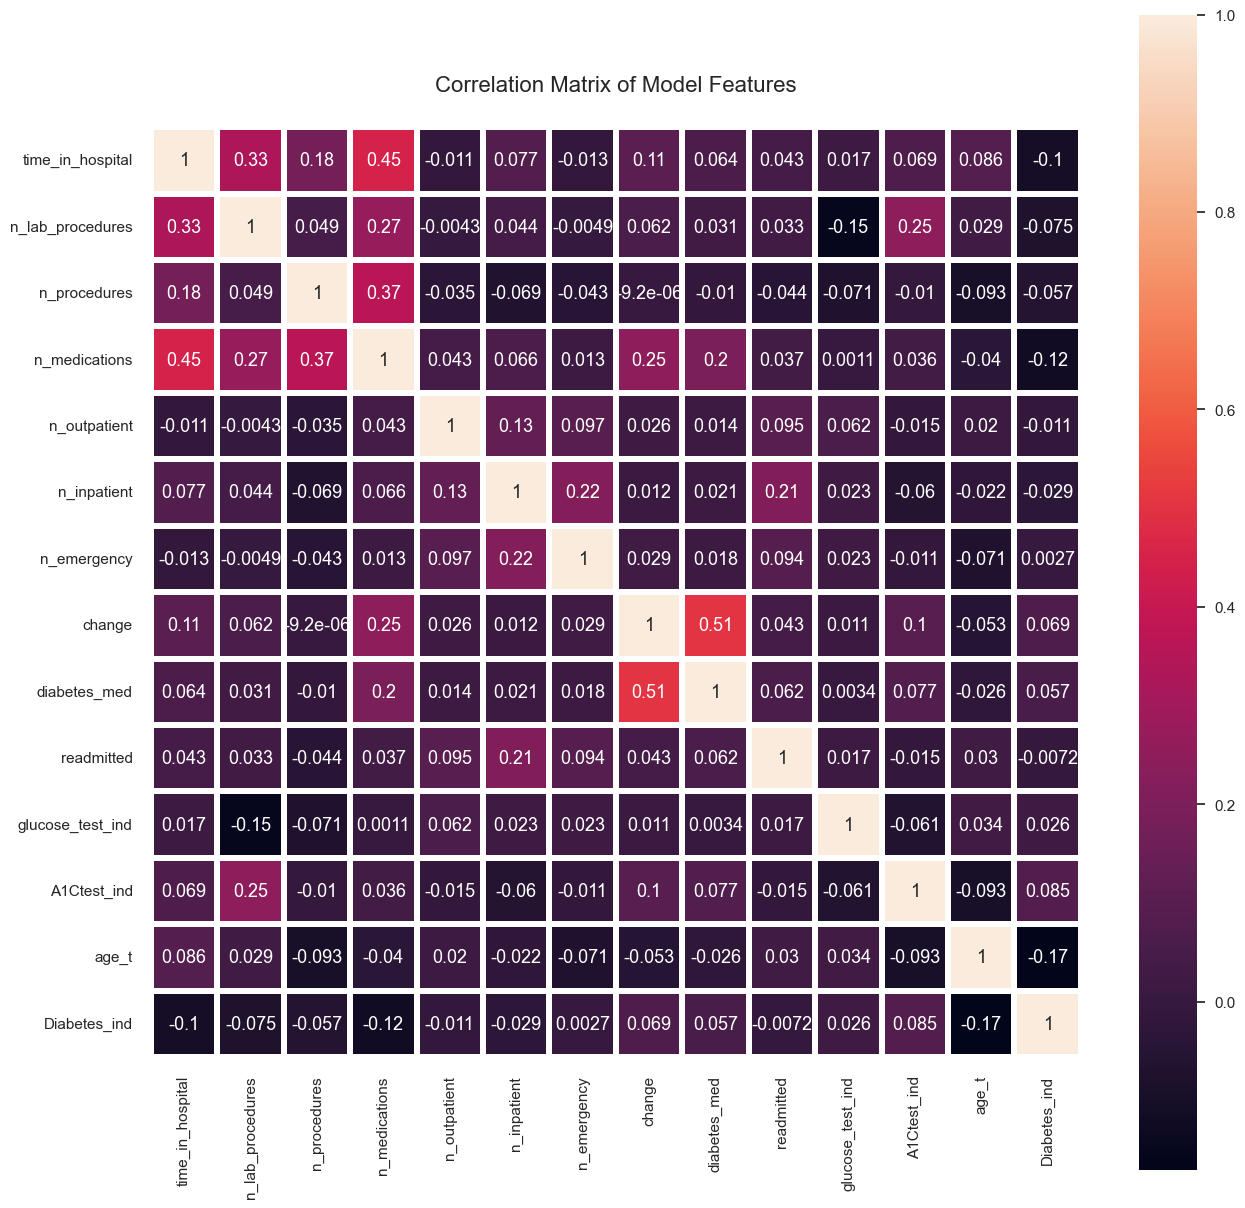

In [55]:
def corr_matrix(dataframe, x, y, title):
    plt.subplots(figsize=(x, y))
    plt.title(title, fontsize=16,y=1.03)
    return sns.heatmap(dataframe.corr(),
            annot=True,
            linewidths=3,
            annot_kws={"fontsize":13},
            square=True,
           )

corr_matrix(data_features, 15, 15, 'Correlation Matrix of Model Features')

In [56]:
#Transforming all colimns that have noticeable skewness
transformCols = ['time_in_hospital','n_lab_procedures','n_procedures',
                 'n_medications','n_outpatient','n_inpatient','n_emergency']
all([pd.api.types.is_numeric_dtype(data_features[col]) for col in transformCols])

True

In [57]:
data_log = data_features.copy()
# Perform a log transformation of the data to unskew the data
for feat in transformCols:
    #Add one to avoid INF values
    data_log[feat] = np.log(1+data_features[feat])

#Check how many INF readings we have in the data
np.isinf(data_log).sum()

#Note the high rates of INF readings in n_procedures, n_outpatient, n_inpatient and n_emergency 

time_in_hospital    0
n_lab_procedures    0
n_procedures        0
n_medications       0
n_outpatient        0
n_inpatient         0
n_emergency         0
change              0
diabetes_med        0
readmitted          0
glucose_test_ind    0
A1Ctest_ind         0
age_t               0
Diabetes_ind        0
dtype: int64

In [58]:
#Change INF values to mean for each feature
for i in transformCols:
    data_log[i].replace([np.inf, -np.inf], np.nan, inplace=True)
    data_log[i] = data_log[i].fillna(data_log[i].mean())

np.isinf(data_log).sum()

time_in_hospital    0
n_lab_procedures    0
n_procedures        0
n_medications       0
n_outpatient        0
n_inpatient         0
n_emergency         0
change              0
diabetes_med        0
readmitted          0
glucose_test_ind    0
A1Ctest_ind         0
age_t               0
Diabetes_ind        0
dtype: int64

In [59]:
# Instantiate StandardScaler, PCA as scaler and pca respectively
scaler = StandardScaler()
pca = PCA()
# Create the pipeline using scaler and the pca object
pipeline = make_pipeline(scaler, pca)

# Fit and transform the model
data_normalized = pipeline.fit_transform(data_log)
data_normalized.shape

(25000, 14)

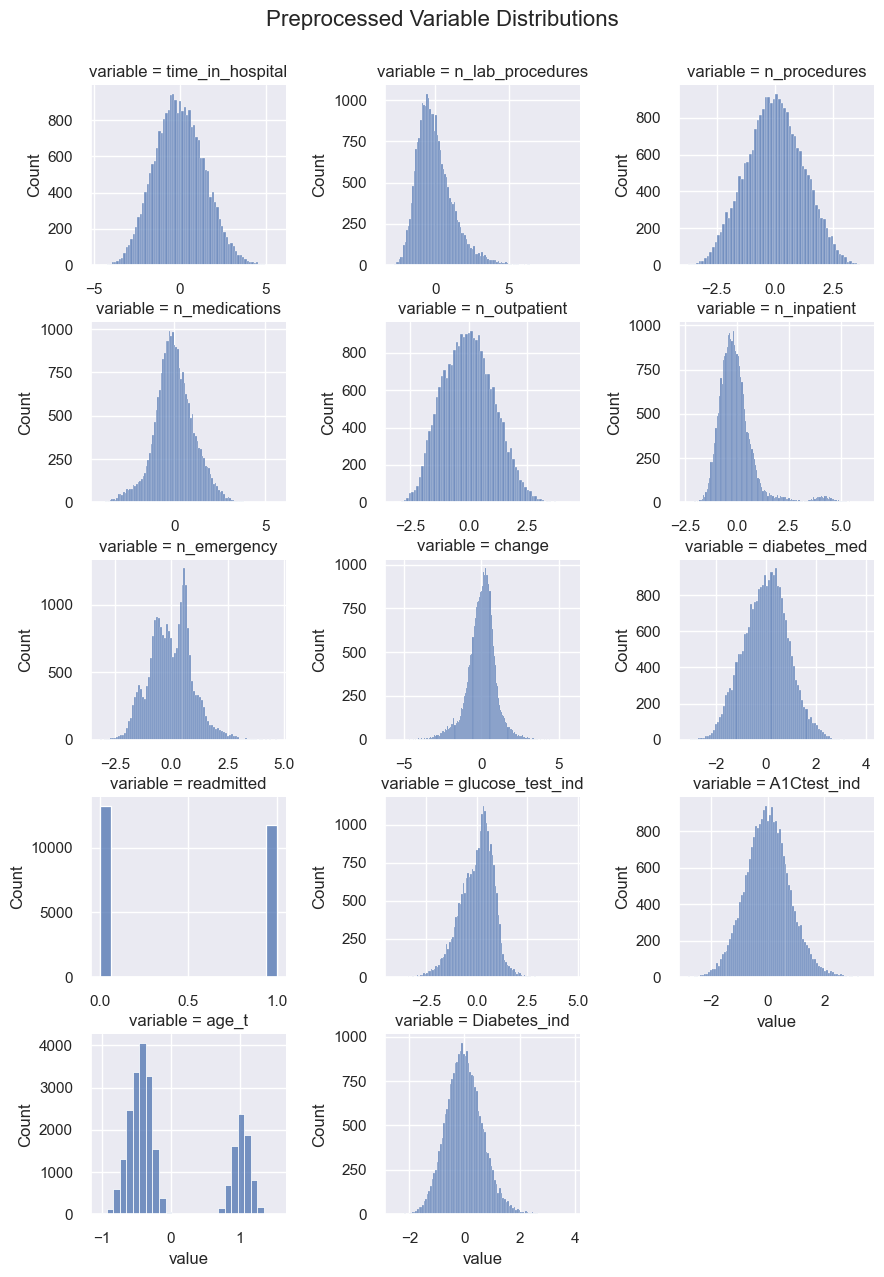

In [60]:
#Now need to scale the data for further analysis
# Instantiate StandardScaler, PCA as scaler and pca respectively
#scaler = StandardScaler()
#scaler.fit(df_log)

# Scale and center the data
#df_normalized = scaler.transform(df_log)

# Create a pandas DataFrame of the processed data
data_processed = pd.DataFrame(
    data=data_normalized, index=data_log.index, columns=data_log.columns
)

#Make sure our y variable (readmitted indicator) is not processed - Required for logistic regression
#Not sure this is legit given we are dropping in a non-processed target variable
data_processed['readmitted'] = data_features['readmitted']

# Plot the distributions of the selected variables
g = sns.FacetGrid(data_processed.melt(), 
                  col="variable", 
                  col_wrap = 3, 
                  sharey=False, 
                  sharex=False
                 )
g.map(sns.histplot, "value")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Preprocessed Variable Distributions", fontsize=16,y=.85)
plt.show()

<AxesSubplot:title={'center':'Correlation Matrix of Model Features'}>

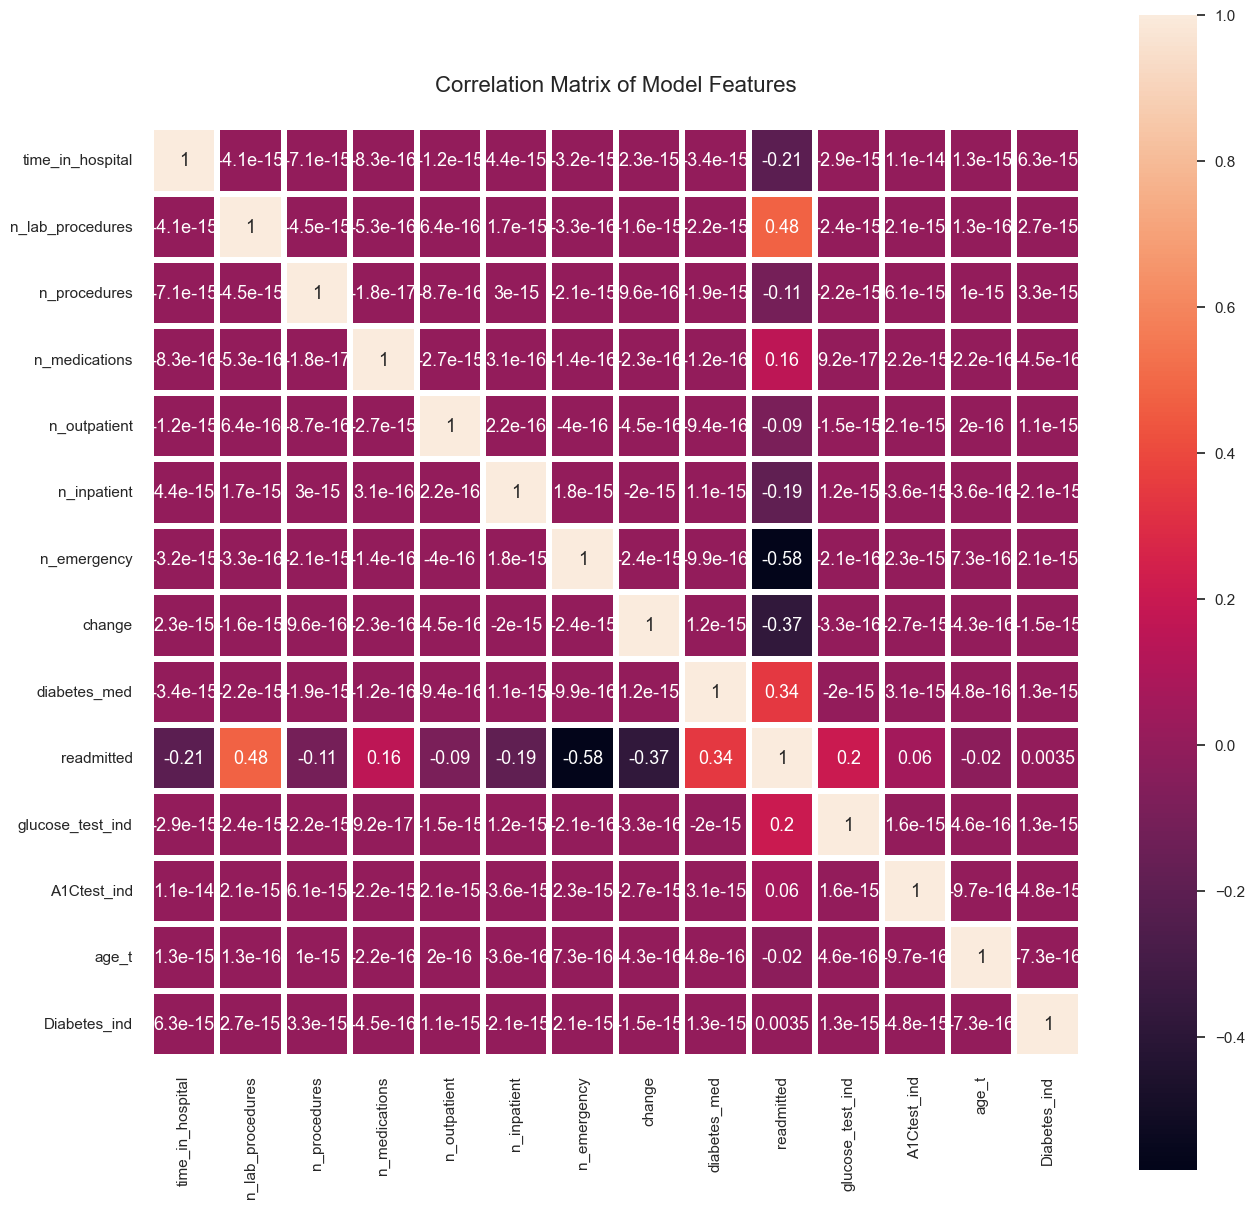

In [61]:
corr_matrix(data_processed, 15, 15, 'Correlation Matrix of Model Features')

### Look for Collinearity in the Data

Text(0.5, 1.01, 'Preprocessed Variable Distributions')

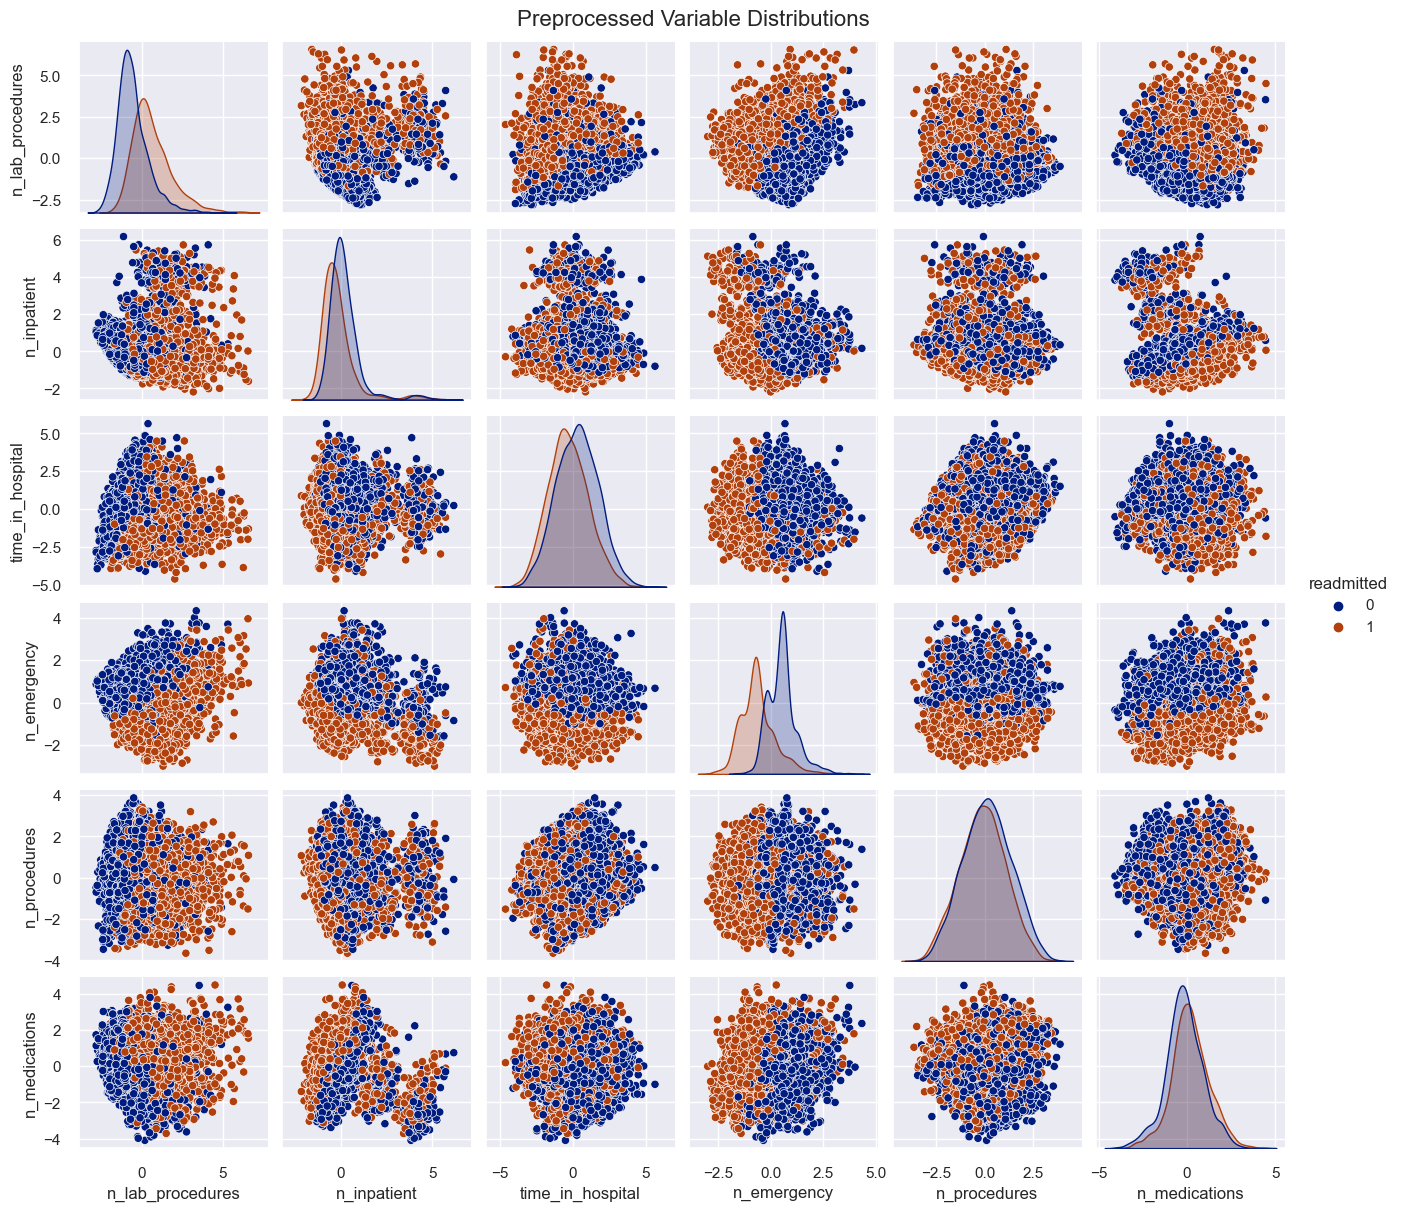

In [62]:
#Let's use a pairplot as a convenient way to visualize the numeric information to see if there are any correlations among the data
#Notice the linear relationships in the following variables: n_lab_procedures, n_medications, n_procedures, time_in_hospital and n_inpatient


g = sns.pairplot(data=data_processed.sample(10000), 
#could use either df_processed or df_features 
#df_processed should show no associations between features as those have been decomposed via PCA
#df_features will show the associations in raw data
             vars = ['n_lab_procedures', 'n_inpatient', 'time_in_hospital', 
                     'n_emergency', 'n_procedures', 'n_medications'],  
             kind="scatter", # kind of plots for each pair {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
             diag_kind="kde",   # kind of plots on the diagonal {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
             hue="readmitted",
             height=2,
             aspect=1.1,
             palette="dark"
             )
g.fig.suptitle("Preprocessed Variable Distributions", fontsize=16, y=1.01)

#Note: These are log transformed, PCA'd (Decomposed) and standardized variables, so interpretation is difficult beyond directional association
#When using the df_features dataframe, Notice seeming linear relationships between time_in_hospital, n_lab_procedures, n_procedures - Appears that time in hospital is related to how many procedures (lab or other) a patient gets during the stay. Can probably remove 1 or two of these

In [63]:
# Split the data into two DataFrames: X (features) and y (target variable)
X = data_processed.drop(columns=['readmitted'],axis=1)  # Specify at least one column as a feature
y = data_processed["readmitted"]  # Specify one column as the target variable

# Split the data into train and test subsets
# You can adjust the test size and random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.275, random_state=123
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18124, 13), (6876, 13), (18124,), (6876,))

In [64]:
y_train

15318    1
19189    0
8849     0
20370    0
22174    1
        ..
15377    0
21602    0
17730    0
15725    1
19966    0
Name: readmitted, Length: 18124, dtype: int64

### Run a RandomForestRegressor & Extract Feature Importances

In [65]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "n_estimators": 97,  # Number of trees in the forest
    "max_depth": 10,  # Max depth of the tree
    "min_samples_split": 3,  # Min number of samples required to split a node
    "min_samples_leaf": 1,  # Min number of samples required at a leaf node
    "ccp_alpha": 0,  # Cost complexity parameter for pruning
    "random_state": 123,
}
#{'n_estimators': 97, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 10, 'ccp_alpha': 0}

# Create a RandomForestRegressor object with the parameters above
rf = RandomForestClassifier(**params)

# Train the random forest on the train set
rf = rf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = rf.predict(X_test)

In [66]:
y_pred = rf.predict(X_test)
print('Training Set:', rf.score(X_train,y_train))
print('Test Set:', rf.score(X_test,y_test))

# Calculate the accuracy, precision, and recall scores
print("Accuracy:", "{:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precision:", "{:.2f}%".format(precision_score(y_test, y_pred)*100))
print("Recall:", "{:.2f}%".format(recall_score(y_test, y_pred)*100))
print("Area Under the Curve:", "{:.2f}%".format(roc_auc_score(y_test, y_pred)*100))

#100% training set... Overfitted!

Training Set: 1.0
Test Set: 0.9984002326934264
Accuracy: 99.84%
Precision: 99.75%
Recall: 99.91%
Area Under the Curve: 99.84%


### Cross Validation

In [67]:
scores = cross_val_score(rf, X_test, y_test, error_score="raise", cv=5, verbose=True)
scores

#I still think we are overfitted, but cross validation (stratified in this case), does not suggest an aberration in training data

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.8s finished


array([0.99636628, 0.99490909, 0.99418182, 0.99854545, 0.99927273])

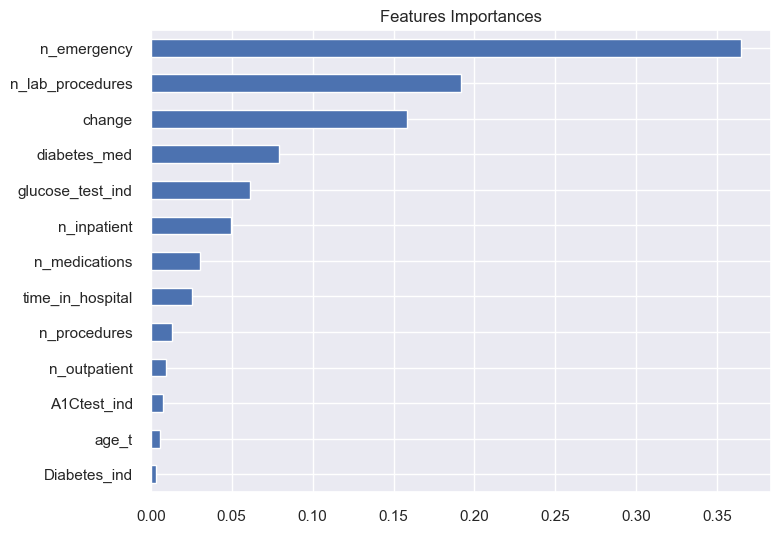

In [68]:
# Create a sorted Series of features importances
importances_sorted = pd.Series(
    data=rf.feature_importances_, index=X_train.columns
).sort_values()

# Plot a horizontal barplot of importances_sorted
importances_sorted.plot(kind="barh")
plt.title("Features Importances")
plt.show()

### Parameter Tuning

In [69]:
# Define a parameter grid with distributions of possible parameters to use
rs_param_grid = {
    "n_estimators": list((range(20, 200))),
    "max_depth": list((range(3, 15))),
    "min_samples_split": list((range(2, 5))),
    "min_samples_leaf": list((range(1, 5))),
    "ccp_alpha": [0, 0.001, 0.01, 0.1],
}

# Create a RandomForestRegressor
rf = RandomForestClassifier(random_state=123)

# Instantiate RandomizedSearchCV() with rf and the parameter grid
rf_rs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rs_param_grid,
    cv=3,  # Number of folds
    n_iter=10,  # Number of parameter candidate settings to sample
    verbose=1,  # The higher this is, the more messages are outputed
    scoring="accuracy",  # Metric to evaluate performance
    random_state=123
)

# Train the model on the training set
rf_rs.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", rf_rs.best_params_)
print("Best performance: ", rf_rs.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'n_estimators': 121, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 13, 'ccp_alpha': 0}
Best performance:  0.9979033356290586


### Trying out KNNClassifier

In [70]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "n_neighbors": 20
}

# Create a logistic regression classifier object with the parameters above
knn1 = KNeighborsClassifier(**params)

# Train the classifer on the train set
knn1 = knn1.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = knn1.predict(X_test)
print('Training Set:', knn1.score(X_train,y_train))
print('Test Set:', knn1.score(X_test,y_test))

#99% is overfit - This is due to using the untransformed target variable

/Users/jibinjoby/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/jibinjoby/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

Training Set: 0.9990068417567866
Test Set: 0.9989819662594531


/Users/jibinjoby/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [71]:
# Calculate the accuracy, precision, and recall scores
print("Accuracy:", "{:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precision:", "{:.2f}%".format(precision_score(y_test, y_pred)*100))
print("Recall:", "{:.2f}%".format(recall_score(y_test, y_pred)*100))
print("Area Under the Curve:", "{:.2f}%".format(roc_auc_score(y_test, y_pred)*100))

Accuracy: 99.90%
Precision: 99.84%
Recall: 99.94%
Area Under the Curve: 99.90%


In [72]:
scores = cross_val_score(knn1, X_test, y_test, error_score="raise", cv=5, verbose=True)
scores

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/jibinjoby/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/jibinjoby/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` 

array([0.99563953, 0.99854545, 0.99709091, 0.99781818, 0.99636364])

### Need for Feature Selection

In [73]:
#Dimensionality Reduction
#Doing dimensionality reduction so that logit model doesn't reach perfect separation

dropCols = ['n_medications', 
            'n_procedures', 
            'time_in_hospital', 
            #'n_inpatient', 
            #'n_lab_procedures',
            'n_emergency',
            'n_outpatient', 
            'glucose_test_ind', 
            'A1Ctest_ind']

data_reduced = data_processed.copy()

for i in dropCols:
    data_reduced.drop(columns = [i], axis=1, inplace=True)

data_reduced

,n_lab_procedures,n_inpatient,change,diabetes_med,readmitted,age_t,Diabetes_ind
0,-0.321006,0.624004,-1.084182,-0.992298,0,1.191179,0.514083
1,-1.123283,-0.425072,0.187277,0.032259,0,0.957996,0.209736
2,-0.022460,-0.659701,0.154670,0.954961,1,-0.301107,-0.078244
3,1.071599,-0.154332,-1.511159,-0.882269,1,-0.424868,-0.220454
4,-0.387288,-0.612113,0.563049,0.401502,0,0.925900,0.099732
...,...,...,...,...,...,...,...
24995,-1.316886,0.801261,-0.640709,0.387048,1,-0.437455,-0.667067
24996,-0.457455,-0.063196,-0.928451,1.581372,1,-0.454362,-1.447173
24997,1.443011,1.694645,0.509614,1.336231,1,-0.681927,0.744099
24998,-1.134837,-0.149590,-0.044106,-1.318902,0,-0.507171,0.050998


In [74]:
# Split the data into two DataFrames: X (features) and y (target variable)
X = data_reduced.drop(columns=['readmitted'],axis=1)  # Specify at least one column as a feature
y = data_reduced["readmitted"]  # Specify one column as the target variable

# Split the data into train and test subsets
# You can adjust the test size and random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=123
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18750, 6), (6250, 6), (18750,), (6250,))

### Running a LogisticRegression

In [75]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "penalty": "l2",  # Norm of the penalty: 'l1', 'l2', 'elasticnet', 'none'
    #"C": 1,  # Inverse of regularization strength, a positive float
    "random_state": 123,
}

# Create a logistic regression classifier object with the parameters above
clf = LogisticRegression(**params)

# Train the classifer on the train set
clf = clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test)
df_coef = pd.DataFrame(data=clf.coef_[0])

df_coef = df_coef.set_index(np.array(clf.feature_names_in_))
df_coef.rename(columns={0: 'coef'},inplace=True)
df_coef.sort_values('coef')

,coef
change,-1.803410
n_inpatient,-0.729650
age_t,-0.100714
Diabetes_ind,0.032104
diabetes_med,1.531563
n_lab_procedures,1.633761


In [76]:
print('Training Set:', clf.score(X_train,y_train))
print('Test Set:', clf.score(X_test,y_test))


'''
Logistic regression models tend to overfit the data, particularly in high-dimensional settings 
(which is the clever way of saying cases with lots of predictors). For this reason, it’s common to use some 
kind of regularisation method to prevent the model from fitting too closely to the training data.

In this case, I just did a small amout of dimensionality reduction.
'''

Training Set: 0.8668266666666666
Test Set: 0.86736


'\nLogistic regression models tend to overfit the data, particularly in high-dimensional settings \n(which is the clever way of saying cases with lots of predictors). For this reason, it’s common to use some \nkind of regularisation method to prevent the model from fitting too closely to the training data.\n\nIn this case, I just did a small amout of dimensionality reduction.\n'

In [93]:
# Calculate the accuracy, precision, and recall scores
print("Accuracy:", "{:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precision:", "{:.2f}%".format(precision_score(y_test, y_pred)*100))
print("Recall:", "{:.2f}%".format(recall_score(y_test, y_pred)*100))
print("F1 Score:", "{:.2f}%".format(f1_score(y_test, y_pred) * 100))
print("Area Under the Curve:", "{:.2f}%".format(roc_auc_score(y_test, y_pred)*100))

#Overfit

Accuracy: 92.03%
Precision: 87.79%
Recall: 96.42%
F1 Score: 91.90%
Area Under the Curve: 92.29%


Text(0.5, 28.38888888888887, 'Predicted label')

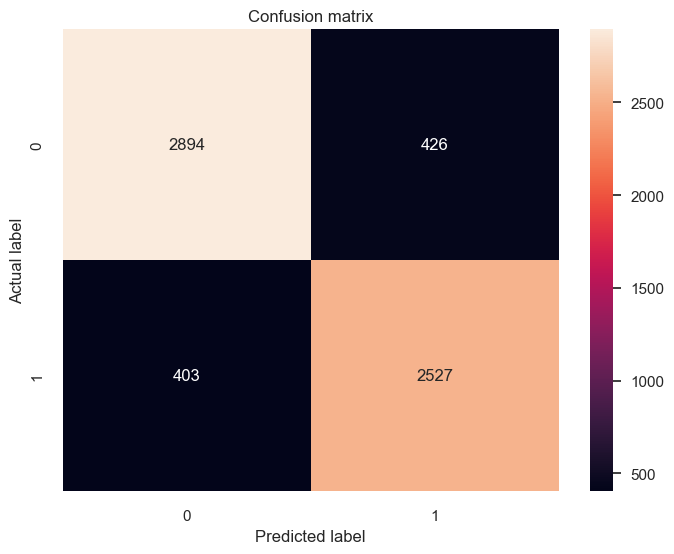

In [78]:
# Calculate confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot a labeled confusion matrix with Seaborn
sns.heatmap(cnf_matrix, annot=True, fmt="g")
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

### Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)
print("Accuracy:", "{:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precision:", "{:.2f}%".format(precision_score(y_test, y_pred)*100))
print("Recall:", "{:.2f}%".format(recall_score(y_test, y_pred)*100))
print("F1 Score:", "{:.2f}%".format(f1_score(y_test, y_pred) * 100))
print("Area Under the Curve:", "{:.2f}%".format(roc_auc_score(y_test, y_pred)*100))


Accuracy: 89.17%
Precision: 88.30%
Recall: 88.63%
F1 Score: 88.47%
Area Under the Curve: 89.14%


### SVM

In [95]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create the SVM classifier
svm_classifier = SVC()

# Train the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)
print("Accuracy:", "{:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precision:", "{:.2f}%".format(precision_score(y_test, y_pred)*100))
print("Recall:", "{:.2f}%".format(recall_score(y_test, y_pred)*100))
print("F1 Score:", "{:.2f}%".format(f1_score(y_test, y_pred) * 100))
print("Area Under the Curve:", "{:.2f}%".format(roc_auc_score(y_test, y_pred)*100))

Accuracy: 92.03%
Precision: 87.79%
Recall: 96.42%
F1 Score: 91.90%
Area Under the Curve: 92.29%


### Lasso Regression & alpha parameter tuning to isolate significant features

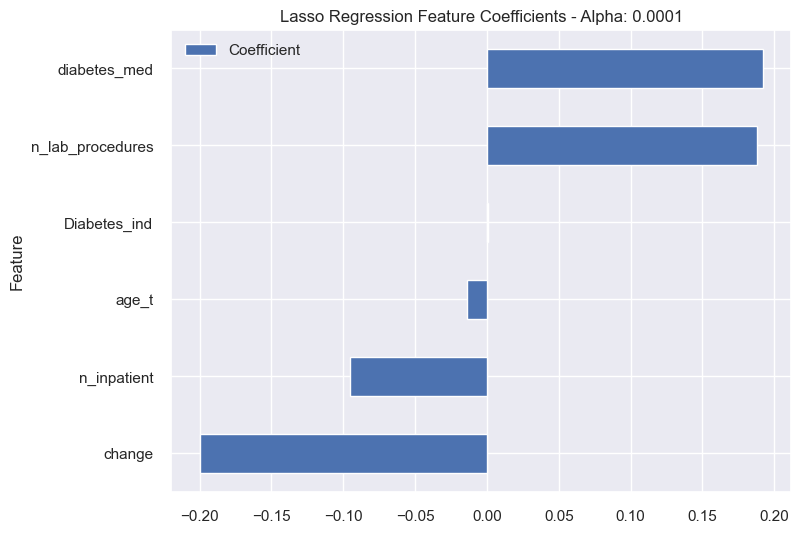

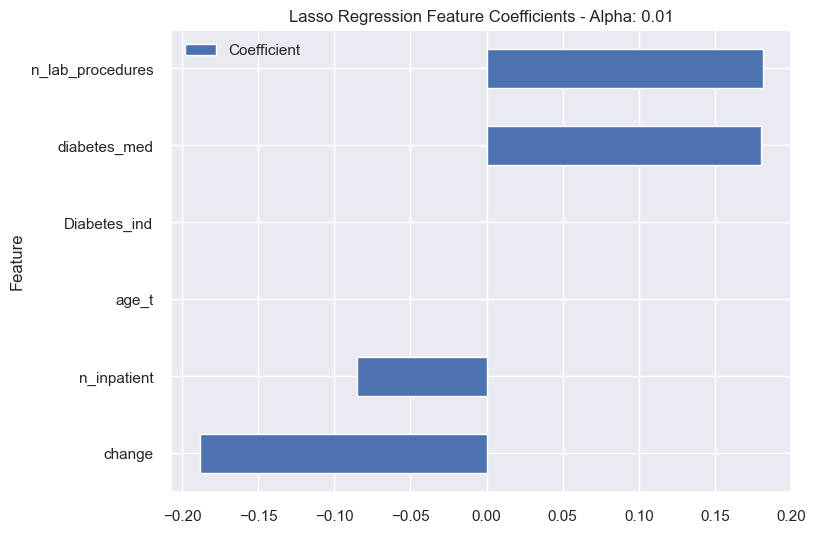

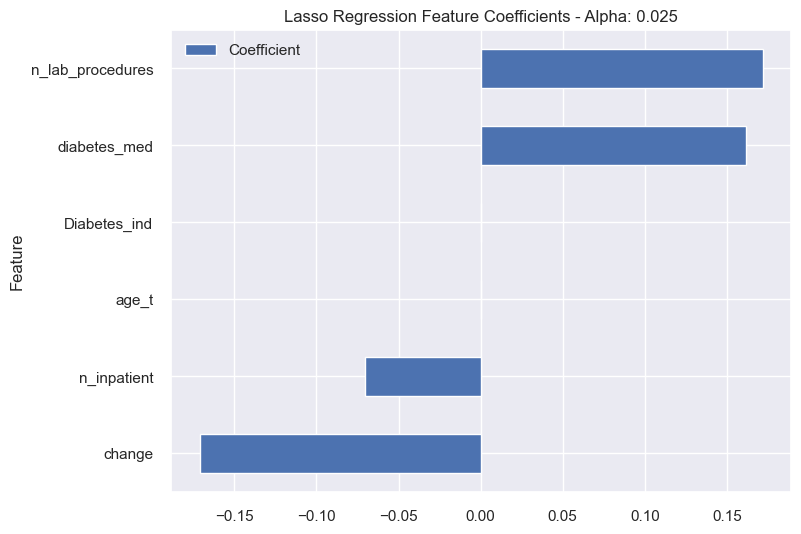

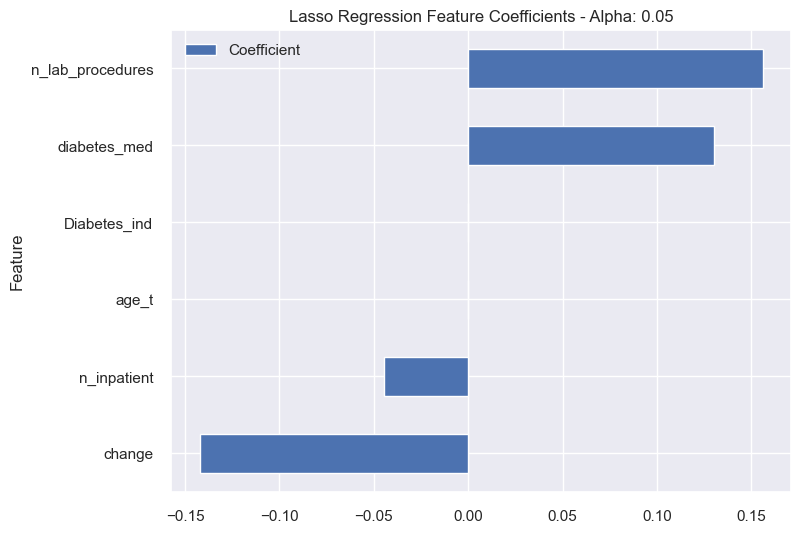

In [79]:
scores = []
for alpha in [0.0001,0.01,0.025,0.05]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    
    scores.append(lasso.score(X_test, y_test))
    lasso_coef = lasso.coef_
    data_plot = pd.DataFrame(list(zip(lasso_coef,lasso.feature_names_in_))).set_index(1).sort_values(0).reset_index()
    data_plot.rename(columns={0: 'Coefficient',1:'Feature'},inplace=True)
    data_plot.plot.barh(x='Feature',y='Coefficient',title='Lasso Regression Feature Coefficients - Alpha: {alpha}'.format(alpha=alpha))

### Model Testing with LazyPredict

In [84]:

!pip install lazypredict
#!pip install optuna

  Using cached lazypredict-0.2.12-py2.py3-none-any.whl (12 kB)
  Using cached lightgbm-3.3.5.tar.gz (1.5 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [86 lines of output]
      running bdist_wheel
      /Users/jibinjoby/opt/anaconda3/lib/python3.9/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        warnings.warn(
      running build
      running build_py
      creating build
      creating build/lib
      creating build/lib/lightgbm
      copying lightgbm/callback.py -> build/lib/lightgbm
      copying lightgbm/compat.py -> build/lib/lightgbm
      copying lightgbm/plotting.py -> build/lib/lightgbm
      copying lightgbm/__init__.py -> build/lib/lightgbm
      copying lightgbm/engine.py -> build/lib/lightgbm
      copying lightgbm/dask.py -> build/li

In [83]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.metrics import cohen_kappa_score

ModuleNotFoundError: No module named 'lazypredict'